In [130]:
%matplotlib inline

In [ ]:
import nltk

def create_dict(word_list):
    word_dict = {}
    for word in word_list:
        if not word in word_dict:
            word_dict[word] = len(word_dict)
    return word_dict

raw_data = nltk.corpus.treebank.words()
word_list = [word.lower() for word in raw_data if word.isalpha()]
word_dict = create_dict(word_list)

In [156]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def plot(data):
    plt.figure()
    plt.plot(data)

In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as d
import torch.nn.functional as F
import torch.optim as optim


class Skipgram(nn.Module):
    def __init__(self, hidden_size, vocab_size):
        super(Skipgram, self).__init__()
        self.embedding_layer = nn.Embedding(vocab_size, hidden_size)
        self.output_layer = nn.Linear(hidden_size, vocab_size)
        
    def forward(self, input):
        input_times_embedding = self.embedding_layer(input)
        output = self.output_layer(input_times_embedding)
        return torch.squeeze(output)
    
def train(input, labels):
    optimizer.zero_grad()
    input = Variable(input)
    output = skipgram(input)
    print(labels)
    labels.transpose(0,1)
    loss = skipgram_loss(output, labels)
    loss.backward()
    optimizer.step()


def trainAll(sentences, context_size, word_dict):
    dataset = SkipgramDataset(sentences, context_size, word_dict)
    
    data_loader = d.DataLoader(dataset, batch_size = batch_size)
    i=0
    for word, label in data_loader:
        if (i%100 == 0):
            print(i)
#plot(all_losses)
        train(word, label)
        i+=1

# In the form
# 0 - ('a', ['I', 'am', 'purple', 'moose'])
# 1 - ('purple', ['am', 'a', 'moose', 'that'])
class SkipgramDataset(d.Dataset):
    def __init__(self, text, context_size, word_dict):
        
        # Convert all word to their indices
        indexes = [word_dict[word] for word in text]
        
        # Create word_map
        self.word_list = [(torch.LongTensor([indexes[i]]), torch.LongTensor(indexes[i-context_size: i] + indexes[i+1: i+1+context_size])) 
                         for i in range(context_size, len(text) - context_size)] 
        
    def __len__(self):
        return len(self.word_list)
    
    def __getitem__(self, i):
        return self.word_list[i]
        

    
def skipgram_loss(datapoint, label):
    total_loss = 0
    label = torch.transpose(label, 0, 1)
    for word in label:
#         print(datapoint)
#         print(word)
        new_loss = F.cross_entropy(datapoint, Variable(word))
        total_loss += new_loss
    all_losses.append(total_loss.data[0])
    return total_loss
    
    
hidden_size = 300
batch_size = 3

skipgram = Skipgram(hidden_size, len(word_dict))
optimizer = optim.SGD(skipgram.parameters(), lr = 0.001, momentum=0.9)
all_losses = []
context_size = 2
trainAll(word_list, context_size, word_dict)

    
        
        

0

 0  1  3  4
 1  2  4  5
 2  3  5  6
[torch.LongTensor of size 3x4]


 3  4  6  7
 4  5  7  8
 5  6  8  9
[torch.LongTensor of size 3x4]


  6   7   9  10
  7   8  10  11
  8   9  11   1
[torch.LongTensor of size 3x4]


  9  10   1  12
 10  11  12  13
 11   1  13  14
[torch.LongTensor of size 3x4]


  1  12  14  15
 12  13  15   6
 13  14   6  16
[torch.LongTensor of size 3x4]


 14  15  16  17
 15   6  17  18
  6  16  18  19
[torch.LongTensor of size 3x4]


 16  17  19  20
 17  18  20   2
 18  19   2   3
[torch.LongTensor of size 3x4]


 19  20   3  21
 20   2  21  22
  2   3  22  13
[torch.LongTensor of size 3x4]


  3  21  13  14
 21  22  14  23
 22  13  23  24
[torch.LongTensor of size 3x4]


 13  14  24  25
 14  23  25  26
 23  24  26  27
[torch.LongTensor of size 3x4]


 24  25  27  28
 25  26  28   9
 26  27   9  10
[torch.LongTensor of size 3x4]


 27  28  10  11
 28   9  11  14
  9  10  14  29
[torch.LongTensor of size 3x4]


 10  11  29  30
 11  14  30  31
 14  29  31  32
[


  48  164  165  166
 164  123  166   63
 123  165   63    6
[torch.LongTensor of size 3x4]


 165  166    6  167
 166   63  167  129
  63    6  129  168
[torch.LongTensor of size 3x4]


   6  167  168   52
 167  129   52   53
 129  168   53  169
[torch.LongTensor of size 3x4]


 168   52  169  170
  52   53  170    6
  53  169    6  171
[torch.LongTensor of size 3x4]


 169  170  171  172
 170    6  172  173
   6  171  173   14
[torch.LongTensor of size 3x4]

100

 171  172   14    6
 172  173    6  174
 173   14  174  175
[torch.LongTensor of size 3x4]


  14    6  175   49
   6  174   49  129
 174  175  129  176
[torch.LongTensor of size 3x4]


 175   49  176  177
  49  129  177  169
 129  176  169   63
[torch.LongTensor of size 3x4]


 176  177   63  178
 177  169  178  179
 169   63  179   46
[torch.LongTensor of size 3x4]


  63  178   46    6
 178  179    6  180
 179   46  180   14
[torch.LongTensor of size 3x4]


  46    6   14   47
   6  180   47  143
 180   14  143  181
[torc


 273    9  275  276
   9  274  276   83
 274  275   83  277
[torch.LongTensor of size 3x4]


 275  276  277   21
 276   83   21  278
  83  277  278  233
[torch.LongTensor of size 3x4]


 277   21  233   21
  21  278   21  279
 278  233  279  280
[torch.LongTensor of size 3x4]


 233   21  280    6
  21  279    6  281
 279  280  281  233
[torch.LongTensor of size 3x4]


 280    6  233   83
   6  281   83    9
 281  233    9  282
[torch.LongTensor of size 3x4]


 233   83  282   36
  83    9   36   37
   9  282   37   38
[torch.LongTensor of size 3x4]


 282   36   38   41
  36   37   41   49
  37   38   49  283
[torch.LongTensor of size 3x4]


  38   41  283  284
  41   49  284   14
  49  283   14  285
[torch.LongTensor of size 3x4]


 283  284  285  286
 284   14  286   69
  14  285   69  287
[torch.LongTensor of size 3x4]


 285  286  287  288
 286   69  288  289
  69  287  289   14
[torch.LongTensor of size 3x4]


 287  288   14    6
 288  289    6  196
 289   14  196   64
[torch.Lo


 395  162  396  397
 162  135  397  155
 135  396  155  398
[torch.LongTensor of size 3x4]


 396  397  398  399
 397  155  399   37
 155  398   37  143
[torch.LongTensor of size 3x4]


 398  399  143  400
 399   37  400  392
  37  143  392  325
[torch.LongTensor of size 3x4]


 143  400  325   83
 400  392   83  315
 392  325  315  401
[torch.LongTensor of size 3x4]


 325   83  401  402
  83  315  402   37
 315  401   37  403
[torch.LongTensor of size 3x4]


 401  402  403  404
 402   37  404  273
  37  403  273  334
[torch.LongTensor of size 3x4]


 403  404  334  317
 404  273  317  405
 273  334  405   14
[torch.LongTensor of size 3x4]


 334  317   14    6
 317  405    6  331
 405   14  331  317
[torch.LongTensor of size 3x4]


  14    6  317  406
   6  331  406  207
 331  317  207  161
[torch.LongTensor of size 3x4]


 317  406  161  407
 406  207  407    6
 207  161    6   91
[torch.LongTensor of size 3x4]


 161  407   91  340
 407    6  340   37
   6   91   37  161
[torch.Lo


   6  394    6  490
 394   74  490  504
  74    6  504  501
[torch.LongTensor of size 3x4]


   6  490  501  505
 490  504  505  135
 504  501  135  506
[torch.LongTensor of size 3x4]


 501  505  506  342
 505  135  342   37
 135  506   37  507
[torch.LongTensor of size 3x4]


 506  342  507  143
 342   37  143  507
  37  507  507  508
[torch.LongTensor of size 3x4]


 507  143  508   37
 143  507   37  509
 507  508  509    6
[torch.LongTensor of size 3x4]


 508   37    6  498
  37  509  498  497
 509    6  497   12
[torch.LongTensor of size 3x4]


   6  498   12  510
 498  497  510   83
 497   12   83    6
[torch.LongTensor of size 3x4]


  12  510    6  511
 510   83  511  288
  83    6  288  512
[torch.LongTensor of size 3x4]


   6  511  512  513
 511  288  513    6
 288  512    6  514
[torch.LongTensor of size 3x4]


 512  513  514   42
 513    6   42  515
   6  514  515   37
[torch.LongTensor of size 3x4]


 514   42   37  516
  42  515  516    6
 515   37    6  497
[torch.Lo


 620  621  623   21
 621  622   21  624
 622  623  624  625
[torch.LongTensor of size 3x4]


 623   21  625    6
  21  624    6  519
 624  625  519  626
[torch.LongTensor of size 3x4]


 625    6  626   63
   6  519   63    9
 519  626    9  627
[torch.LongTensor of size 3x4]


 626   63  627  628
  63    9  628  629
   9  627  629   14
[torch.LongTensor of size 3x4]


 627  628   14  611
 628  629  611   21
 629   14   21  547
[torch.LongTensor of size 3x4]


  14  611  547  630
 611   21  630  631
  21  547  631   37
[torch.LongTensor of size 3x4]


 547  630   37    6
 630  631    6  570
 631   37  570  535
[torch.LongTensor of size 3x4]


  37    6  535  632
   6  570  632  633
 570  535  633  207
[torch.LongTensor of size 3x4]


 535  632  207  634
 632  633  634  455
 633  207  455  635
[torch.LongTensor of size 3x4]


 207  634  635  636
 634  455  636    6
 455  635    6  637
[torch.LongTensor of size 3x4]


 635  636  637  638
 636    6  638   38
   6  637   38   51
[torch.Lo



 747   83  748  135
  83  730  135  161
 730  748  161    9
[torch.LongTensor of size 3x4]


 748  135    9  749
 135  161  749  750
 161    9  750  143
[torch.LongTensor of size 3x4]


   9  749  143    9
 749  750    9   90
 750  143   90  421
[torch.LongTensor of size 3x4]


 143    9  421  751
   9   90  751  752
  90  421  752  753
[torch.LongTensor of size 3x4]


 421  751  753  754
 751  752  754   37
 752  753   37  161
[torch.LongTensor of size 3x4]


 753  754  161   71
 754   37   71  143
  37  161  143  755
[torch.LongTensor of size 3x4]


 161   71  755  730
  71  143  730  725
 143  755  725  726
[torch.LongTensor of size 3x4]


 755  730  726  733
 730  725  733  756
 725  726  756  205
[torch.LongTensor of size 3x4]


 726  733  205  757
 733  756  757   83
 756  205   83   81
[torch.LongTensor of size 3x4]


 205  757   81   29
 757   83   29   90
  83   81   90  362
[torch.LongTensor of size 3x4]


  81   29  362   14
  29   90   14  758
  90  362  758  759
[torch.L


   8  833  363  834
 833    8  834   83
   8  363   83   21
[torch.LongTensor of size 3x4]


 363  834   21   83
 834   83   83  810
  83   21  810   74
[torch.LongTensor of size 3x4]


  21   83   74    6
  83  810    6  783
 810   74  783   12
[torch.LongTensor of size 3x4]


  74    6   12  564
   6  783  564  104
 783   12  104  835
[torch.LongTensor of size 3x4]


  12  564  835   37
 564  104   37  836
 104  835  836   71
[torch.LongTensor of size 3x4]


 835   37   71    9
  37  836    9  837
 836   71  837   83
[torch.LongTensor of size 3x4]


  71    9   83  785
   9  837  785  838
 837   83  838   83
[torch.LongTensor of size 3x4]


  83  785   83    6
 785  838    6  446
 838   83  446  690
[torch.LongTensor of size 3x4]


  83    6  690  839
   6  446  839   14
 446  690   14  773
[torch.LongTensor of size 3x4]


 690  839  773  785
 839   14  785  838
  14  773  838  840
[torch.LongTensor of size 3x4]


 773  785  840    9
 785  838    9  841
 838  840  841   14
[torch.Lo



 896  783  108  161
 783  135  161  914
 135  108  914  915
[torch.LongTensor of size 3x4]


 108  161  915  302
 161  914  302   21
 914  915   21  916
[torch.LongTensor of size 3x4]


 915  302  916  544
 302   21  544  917
  21  916  917   14
[torch.LongTensor of size 3x4]


 916  544   14   77
 544  917   77   95
 917   14   95  871
[torch.LongTensor of size 3x4]


  14   77  871   74
  77   95   74    6
  95  871    6  163
[torch.LongTensor of size 3x4]


 871   74  163  718
  74    6  718  127
   6  163  127  918
[torch.LongTensor of size 3x4]


 163  718  918  638
 718  127  638  919
 127  918  919  522
[torch.LongTensor of size 3x4]


 918  638  522   51
 638  919   51  262
 919  522  262    9
[torch.LongTensor of size 3x4]


 522   51    9  186
  51  262  186  906
 262    9  906   21
[torch.LongTensor of size 3x4]


   9  186   21   84
 186  906   84  920
 906   21  920  921
[torch.LongTensor of size 3x4]


  21   84  921   37
  84  920   37  892
 920  921  892   14
[torch.L


 449  207  898  986
 207    6  986  892
   6  898  892   14
[torch.LongTensor of size 3x4]


 898  986   14   77
 986  892   77  876
 892   14  876  987
[torch.LongTensor of size 3x4]


  14   77  987  988
  77  876  988  989
 876  987  989  135
[torch.LongTensor of size 3x4]


 987  988  135  554
 988  989  554  990
 989  135  990   83
[torch.LongTensor of size 3x4]


 135  554   83   77
 554  990   77  991
 990   83  991  992
[torch.LongTensor of size 3x4]


  83   77  992  993
  77  991  993  994
 991  992  994  995
[torch.LongTensor of size 3x4]


 992  993  995  996
 993  994  996  997
 994  995  997    2
[torch.LongTensor of size 3x4]


 995  996    2    3
 996  997    3   21
 997    2   21   22
[torch.LongTensor of size 3x4]


   2    3   22  302
   3   21  302   21
  21   22   21  916
[torch.LongTensor of size 3x4]


  22  302  916  926
 302   21  926  917
  21  916  917   14
[torch.LongTensor of size 3x4]


 916  926   14  998
 926  917  998  999
 917   14  999  192
[torch.Lo


   51    37    84  1065
   37  1064  1065   207
 1064    84   207     9
[torch.LongTensor of size 3x4]


   84  1065     9   454
 1065   207   454   155
  207     9   155  1018
[torch.LongTensor of size 3x4]


    9   454  1018  1019
  454   155  1019    56
  155  1018    56  1065
[torch.LongTensor of size 3x4]


 1018  1019  1065    14
 1019    56    14   456
   56  1065   456   455
[torch.LongTensor of size 3x4]


 1065    14   455     9
   14   456     9   454
  456   455   454     9
[torch.LongTensor of size 3x4]


  455     9     9  1018
    9   454  1018  1019
  454     9  1019  1066
[torch.LongTensor of size 3x4]


    9  1018  1066    74
 1018  1019    74    69
 1019  1066    69  1067
[torch.LongTensor of size 3x4]


 1066    74  1067   391
   74    69   391     6
   69  1067     6   672
[torch.LongTensor of size 3x4]


 1067   391   672   456
  391     6   456  1040
    6   672  1040  1068
[torch.LongTensor of size 3x4]


  672   456  1068  1069
  456  1040  1069   129
 1040 


 1103     6    12   171
    6   974   171    37
  974    12    37  1104
[torch.LongTensor of size 3x4]


   12   171  1104   127
  171    37   127     6
   37  1104     6  1103
[torch.LongTensor of size 3x4]


 1104   127  1103  1101
  127     6  1101   207
    6  1103   207    90
[torch.LongTensor of size 3x4]


 1103  1101    90   595
 1101   207   595   755
  207    90   755    90
[torch.LongTensor of size 3x4]


   90   595    90  1018
  595   755  1018  1019
  755    90  1019   420
[torch.LongTensor of size 3x4]


   90  1018   420    37
 1018  1019    37  1021
 1019   420  1021   456
[torch.LongTensor of size 3x4]

1000

  420    37   456   155
   37  1021   155  1105
 1021   456  1105  1106
[torch.LongTensor of size 3x4]


  456   155  1106    14
  155  1105    14    84
 1105  1106    84  1107
[torch.LongTensor of size 3x4]


 1106    14  1107  1108
   14    84  1108  1026
   84  1107  1026   204
[torch.LongTensor of size 3x4]


 1107  1108   204  1109
 1108  1026  1109  1110
 


 1151   126   952     6
  126     4     6   259
    4   952   259   456
[torch.LongTensor of size 3x4]


  952     6   456    83
    6   259    83  1172
  259   456  1172    51
[torch.LongTensor of size 3x4]


  456    83    51    12
   83  1172    12  1173
 1172    51  1173     6
[torch.LongTensor of size 3x4]


   51    12     6    77
   12  1173    77  1174
 1173     6  1174   522
[torch.LongTensor of size 3x4]


    6    77   522  1151
   77  1174  1151   885
 1174   522   885   455
[torch.LongTensor of size 3x4]


  522  1151   455   522
 1151   885   522     6
  885   455     6  1175
[torch.LongTensor of size 3x4]


  455   522  1175   203
  522     6   203  1176
    6  1175  1176    12
[torch.LongTensor of size 3x4]


 1175   203    12  1177
  203  1176  1177     6
 1176    12     6  1168
[torch.LongTensor of size 3x4]


   12  1177  1168   893
 1177     6   893    74
    6  1168    74    69
[torch.LongTensor of size 3x4]


 1168   893    69    86
  893    74    86     6
   74 


  198     9   992   203
    9  1221   203    74
 1221   992    74   306
[torch.LongTensor of size 3x4]


  992   203   306  1222
  203    74  1222  1223
   74   306  1223  1160
[torch.LongTensor of size 3x4]


  306  1222  1160   372
 1222  1223   372  1224
 1223  1160  1224    51
[torch.LongTensor of size 3x4]


 1160   372    51   390
  372  1224   390   455
 1224    51   455   306
[torch.LongTensor of size 3x4]


   51   390   306  1224
  390   455  1224  1225
  455   306  1225     6
[torch.LongTensor of size 3x4]


  306  1224     6  1159
 1224  1225  1159  1226
 1225     6  1226   224
[torch.LongTensor of size 3x4]


    6  1159   224   136
 1159  1226   136   951
 1226   224   951   155
[torch.LongTensor of size 3x4]


  224   136   155  1151
  136   951  1151    77
  951   155    77   163
[torch.LongTensor of size 3x4]


  155  1151   163  1199
 1151    77  1199     6
   77   163     6  1227
[torch.LongTensor of size 3x4]


  163  1199  1227  1228
 1199     6  1228  1229
    6 


 1284  1151  1285     6
 1151   126     6  1150
  126  1285  1150   852
[torch.LongTensor of size 3x4]


 1285     6   852     6
    6  1150     6   126
 1150   852   126    21
[torch.LongTensor of size 3x4]


  852     6    21  1161
    6   126  1161  1084
  126    21  1084     6
[torch.LongTensor of size 3x4]


   21  1161     6   163
 1161  1084   163   763
 1084     6   763   129
[torch.LongTensor of size 3x4]


    6   163   129   543
  163   763   543  1286
  763   129  1286    37
[torch.LongTensor of size 3x4]


  129   543    37   336
  543  1286   336     9
 1286    37     9  1287
[torch.LongTensor of size 3x4]


   37   336  1287    14
  336     9    14   456
    9  1287   456   155
[torch.LongTensor of size 3x4]


 1287    14   155     6
   14   456     6   446
  456   155   446  1288
[torch.LongTensor of size 3x4]


  155     6  1288    14
    6   446    14  1289
  446  1288  1289    53
[torch.LongTensor of size 3x4]


 1288    14    53     6
   14  1289     6   456
 1289 


 1324    83   728  1325
   83    84  1325  1326
   84   728  1326   725
[torch.LongTensor of size 3x4]


  728  1325   725   726
 1325  1326   726  1327
 1326   725  1327    21
[torch.LongTensor of size 3x4]


  725   726    21  1328
  726  1327  1328  1329
 1327    21  1329   143
[torch.LongTensor of size 3x4]


   21  1328   143     9
 1328  1329     9  1330
 1329   143  1330    14
[torch.LongTensor of size 3x4]


  143     9    14   202
    9  1330   202    51
 1330    14    51    12
[torch.LongTensor of size 3x4]


   14   202    12   166
  202    51   166  1331
   51    12  1331   155
[torch.LongTensor of size 3x4]


   12   166   155  1332
  166  1331  1332  1333
 1331   155  1333    37
[torch.LongTensor of size 3x4]


  155  1332    37   651
 1332  1333   651  1334
 1333    37  1334  1335
[torch.LongTensor of size 3x4]


   37   651  1335    21
  651  1334    21   224
 1334  1335   224  1336
[torch.LongTensor of size 3x4]


 1335    21  1336   860
   21   224   860   174
  224 


 1409  1410   547  1411
 1410    14  1411    69
   14   547    69  1412
[torch.LongTensor of size 3x4]


  547  1411  1412   638
 1411    69   638  1413
   69  1412  1413  1414
[torch.LongTensor of size 3x4]


 1412   638  1414  1365
  638  1413  1365   172
 1413  1414   172    14
[torch.LongTensor of size 3x4]


 1414  1365    14  1415
 1365   172  1415  1416
  172    14  1416    37
[torch.LongTensor of size 3x4]


   14  1415    37  1078
 1415  1416  1078  1393
 1416    37  1393  1408
[torch.LongTensor of size 3x4]


   37  1078  1408   155
 1078  1393   155  1417
 1393  1408  1417   547
[torch.LongTensor of size 3x4]


 1408   155   547  1411
  155  1417  1411  1328
 1417   547  1328  1329
[torch.LongTensor of size 3x4]


  547  1411  1329   155
 1411  1328   155    84
 1328  1329    84  1418
[torch.LongTensor of size 3x4]


 1329   155  1418    42
  155    84    42  1419
   84  1418  1419    37
[torch.LongTensor of size 3x4]


 1418    42    37  1420
   42  1419  1420     9
 1419 


 1469   104  1470   210
  104  1349   210     6
 1349  1470     6   641
[torch.LongTensor of size 3x4]


 1470   210   641  1471
  210     6  1471    14
    6   641    14     6
[torch.LongTensor of size 3x4]


  641  1471     6   518
 1471    14   518  1472
   14     6  1472    74
[torch.LongTensor of size 3x4]


    6   518    74    51
  518  1472    51     4
 1472    74     4  1473
[torch.LongTensor of size 3x4]


   74    51  1473  1474
   51     4  1474  1475
    4  1473  1475    37
[torch.LongTensor of size 3x4]


 1473  1474    37  1476
 1474  1475  1476    84
 1475    37    84  1407
[torch.LongTensor of size 3x4]


   37  1476  1407   498
 1476    84   498    14
   84  1407    14   161
[torch.LongTensor of size 3x4]


 1407   498   161     6
  498    14     6    83
   14   161    83     6
[torch.LongTensor of size 3x4]


  161     6     6  1477
    6    83  1477   808
   83     6   808     6
[torch.LongTensor of size 3x4]


    6  1477     6  1478
 1477   808  1478   207
  808 


    9  1536  1537  1538
 1536   207  1538    21
  207  1537    21  1539
[torch.LongTensor of size 3x4]


 1537  1538  1539  1540
 1538    21  1540   155
   21  1539   155  1541
[torch.LongTensor of size 3x4]


 1539  1540  1541   234
 1540   155   234     8
  155  1541     8     6
[torch.LongTensor of size 3x4]


 1541   234     6  1542
  234     8  1542  1152
    8     6  1152  1543
[torch.LongTensor of size 3x4]


    6  1542  1543    83
 1542  1152    83  1243
 1152  1543  1243     6
[torch.LongTensor of size 3x4]


 1543    83     6  1521
   83  1243  1521  1522
 1243     6  1522    27
[torch.LongTensor of size 3x4]


    6  1521    27   104
 1521  1522   104  1544
 1522    27  1544  1526
[torch.LongTensor of size 3x4]


   27   104  1526     8
  104  1544     8   363
 1544  1526   363    89
[torch.LongTensor of size 3x4]


 1526     8    89   308
    8   363   308   156
  363    89   156  1545
[torch.LongTensor of size 3x4]


   89   308  1545  1546
  308   156  1546  1547
  156 


  750    84    37    14
   84   326    14  1599
  326    37  1599  1606
[torch.LongTensor of size 3x4]


   37    14  1606   992
   14  1599   992  1614
 1599  1606  1614  1615
[torch.LongTensor of size 3x4]


 1606   992  1615   143
  992  1614   143  1616
 1614  1615  1616  1617
[torch.LongTensor of size 3x4]


 1615   143  1617  1618
  143  1616  1618    25
 1616  1617    25     4
[torch.LongTensor of size 3x4]


 1617  1618     4   198
 1618    25   198  1619
   25     4  1619   207
[torch.LongTensor of size 3x4]


    4   198   207  1620
  198  1619  1620     9
 1619   207     9   351
[torch.LongTensor of size 3x4]


  207  1620   351    37
 1620     9    37   108
    9   351   108  1620
[torch.LongTensor of size 3x4]


  351    37  1620    63
   37   108    63     6
  108  1620     6  1621
[torch.LongTensor of size 3x4]


 1620    63  1621    14
   63     6    14     6
    6  1621     6  1622
[torch.LongTensor of size 3x4]


 1621    14  1622   970
   14     6   970     6
    6 


 1169   207   155  1671
  207  1670  1671    83
 1670   155    83     6
[torch.LongTensor of size 3x4]


  155  1671     6  1672
 1671    83  1672   872
   83     6   872    14
[torch.LongTensor of size 3x4]


    6  1672    14  1673
 1672   872  1673   155
  872    14   155   752
[torch.LongTensor of size 3x4]


   14  1673   752   143
 1673   155   143  1477
  155   752  1477   228
[torch.LongTensor of size 3x4]


  752   143   228   540
  143  1477   540   380
 1477   228   380   752
[torch.LongTensor of size 3x4]


  228   540   752    89
  540   380    89  1674
  380   752  1674   234
[torch.LongTensor of size 3x4]


  752    89   234   716
   89  1674   716  1670
 1674   234  1670   420
[torch.LongTensor of size 3x4]


  234   716   420  1675
  716  1670  1675   716
 1670   420   716   155
[torch.LongTensor of size 3x4]


  420  1675   155  1187
 1675   716  1187  1554
  716   155  1554    14
[torch.LongTensor of size 3x4]


  155  1187    14   859
 1187  1554   859  1676
 1554 


 1691   178    84  1717
  178  1716  1717  1718
 1716    84  1718    83
[torch.LongTensor of size 3x4]


   84  1717    83  1288
 1717  1718  1288    21
 1718    83    21     6
[torch.LongTensor of size 3x4]


   83  1288     6   163
 1288    21   163   217
   21     6   217     9
[torch.LongTensor of size 3x4]


    6   163     9   987
  163   217   987   134
  217     9   134  1719
[torch.LongTensor of size 3x4]


    9   987  1719   185
  987   134   185   903
  134  1719   903   547
[torch.LongTensor of size 3x4]


 1719   185   547    44
  185   903    44    14
  903   547    14  1720
[torch.LongTensor of size 3x4]


  547    44  1720  1721
   44    14  1721   127
   14  1720   127     6
[torch.LongTensor of size 3x4]


 1720  1721     6   453
 1721   127   453   992
  127     6   992   993
[torch.LongTensor of size 3x4]


    6   453   993   989
  453   992   989  1691
  992   993  1691   987
[torch.LongTensor of size 3x4]


  993   989   987   988
  989  1691   988    71
 1691 


 718   21  224   63
  21    6   63    9
   6  224    9  718
[torch.LongTensor of size 3x4]


  224    63   718  1775
   63     9  1775    37
    9   718    37     6
[torch.LongTensor of size 3x4]


  718  1775     6  1776
 1775    37  1776  1777
   37     6  1777   789
[torch.LongTensor of size 3x4]


    6  1776   789   188
 1776  1777   188   883
 1777   789   883   672
[torch.LongTensor of size 3x4]


  789   188   672  1778
  188   883  1778  1779
  883   672  1779    37
[torch.LongTensor of size 3x4]


  672  1778    37   531
 1778  1779   531   401
 1779    37   401   446
[torch.LongTensor of size 3x4]


   37   531   446   363
  531   401   363   134
  401   446   134  1780
[torch.LongTensor of size 3x4]


  446   363  1780    37
  363   134    37  1781
  134  1780  1781     6
[torch.LongTensor of size 3x4]


 1780    37     6   136
   37  1781   136    14
 1781     6    14  1782
[torch.LongTensor of size 3x4]


    6   136  1782   424
  136    14   424   372
   14  1782   372 


   14  1598    83     6
 1598  1819     6  1820
 1819    83  1820     6
[torch.LongTensor of size 3x4]


   83     6     6   883
    6  1820   883  1821
 1820     6  1821    83
[torch.LongTensor of size 3x4]


    6   883    83    94
  883  1821    94  1822
 1821    83  1822    14
[torch.LongTensor of size 3x4]


   83    94    14     6
   94  1822     6  1511
 1822    14  1511  1512
[torch.LongTensor of size 3x4]


   14     6  1512    96
    6  1511    96    12
 1511  1512    12  1623
[torch.LongTensor of size 3x4]


 1512    96  1623    37
   96    12    37  1823
   12  1623  1823   135
[torch.LongTensor of size 3x4]

2000

 1623    37   135     6
   37  1823     6   595
 1823   135   595    14
[torch.LongTensor of size 3x4]


  135     6    14  1824
    6   595  1824  1815
  595    14  1815   415
[torch.LongTensor of size 3x4]


   14  1824   415   947
 1824  1815   947   108
 1815   415   108    14
[torch.LongTensor of size 3x4]


  415   947    14  1818
  947   108  1818   219
 


  317  1886   335  1887
 1886     6  1887    14
    6   335    14     6
[torch.LongTensor of size 3x4]


  335  1887     6  1878
 1887    14  1878   907
   14     6   907   545
[torch.LongTensor of size 3x4]


    6  1878   545  1888
 1878   907  1888  1889
  907   545  1889   317
[torch.LongTensor of size 3x4]


  545  1888   317   406
 1888  1889   406  1890
 1889   317  1890  1891
[torch.LongTensor of size 3x4]


  317   406  1891   363
  406  1890   363   431
 1890  1891   431   273
[torch.LongTensor of size 3x4]


 1891   363   273  1892
  363   431  1892   413
  431   273   413     6
[torch.LongTensor of size 3x4]


  273  1892     6  1893
 1892   413  1893  1553
  413     6  1553  1894
[torch.LongTensor of size 3x4]


    6  1893  1894   316
 1893  1553   316   317
 1553  1894   317   223
[torch.LongTensor of size 3x4]


 1894   316   223    14
  316   317    14   308
  317   223   308  1851
[torch.LongTensor of size 3x4]


  223    14  1851   134
   14   308   134     6
  308 


  732   317  1945    52
  317    89    52    53
   89  1945    53   223
[torch.LongTensor of size 3x4]


 1945    52   223  1853
   52    53  1853   413
   53   223   413     6
[torch.LongTensor of size 3x4]


  223  1853     6  1893
 1853   413  1893   844
  413     6   844   590
[torch.LongTensor of size 3x4]


    6  1893   590  1946
 1893   844  1946   108
  844   590   108     6
[torch.LongTensor of size 3x4]


  590  1946     6   317
 1946   108   317  1947
  108     6  1947  1613
[torch.LongTensor of size 3x4]


    6   317  1613   120
  317  1947   120    12
 1947  1613    12    69
[torch.LongTensor of size 3x4]


 1613   120    69  1187
  120    12  1187   134
   12    69   134   995
[torch.LongTensor of size 3x4]


   69  1187   995   135
 1187   134   135  1948
  134   995  1948  1949
[torch.LongTensor of size 3x4]


  995   135  1949  1950
  135  1948  1950    37
 1948  1949    37     6
[torch.LongTensor of size 3x4]


 1949  1950     6   904
 1950    37   904    14
   37 


 1187   317  1990  1991
  317   308  1991   987
  308  1990   987    14
[torch.LongTensor of size 3x4]


 1990  1991    14  1407
 1991   987  1407  1271
  987    14  1271  1850
[torch.LongTensor of size 3x4]


   14  1407  1850    83
 1407  1271    83     6
 1271  1850     6    69
[torch.LongTensor of size 3x4]


 1850    83    69   937
   83     6   937   401
    6    69   401   372
[torch.LongTensor of size 3x4]


   69   937   372  1992
  937   401  1992  1987
  401   372  1987     6
[torch.LongTensor of size 3x4]


  372  1992     6   317
 1992  1987   317   852
 1987     6   852   846
[torch.LongTensor of size 3x4]


    6   317   846     6
  317   852     6  1953
  852   846  1953   155
[torch.LongTensor of size 3x4]


  846     6   155   486
    6  1953   486   123
 1953   155   123  1993
[torch.LongTensor of size 3x4]


  155   486  1993   127
  486   123   127  1994
  123  1993  1994    83
[torch.LongTensor of size 3x4]


 1993   127    83   120
  127  1994   120    37
 1994 


   53  1247     6   968
 1247   904   968   847
  904     6   847  2030
[torch.LongTensor of size 3x4]


    6   968  2030     6
  968   847     6  1813
  847  2030  1813     8
[torch.LongTensor of size 3x4]


 2030     6     8     6
    6  1813     6  1778
 1813     8  1778    37
[torch.LongTensor of size 3x4]


    8     6    37  2031
    6  1778  2031     6
 1778    37     6  2025
[torch.LongTensor of size 3x4]


   37  2031  2025   518
 2031     6   518   305
    6  2025   305     6
[torch.LongTensor of size 3x4]


 2025   518     6  2011
  518   305  2011   960
  305     6   960   666
[torch.LongTensor of size 3x4]


    6  2011   666  1247
 2011   960  1247  2032
  960   666  2032  2033
[torch.LongTensor of size 3x4]


  666  1247  2033    37
 1247  2032    37   932
 2032  2033   932   334
[torch.LongTensor of size 3x4]


 2033    37   334    83
   37   932    83     6
  932   334     6   499
[torch.LongTensor of size 3x4]


  334    83   499   363
   83     6   363  2019
    6 


 135    6  546    6
   6  772    6  841
 772  546  841   83
[torch.LongTensor of size 3x4]


 546    6   83  326
   6  841  326  327
 841   83  327  354
[torch.LongTensor of size 3x4]


   83   326   354     6
  326   327     6  1356
  327   354  1356    42
[torch.LongTensor of size 3x4]


  354     6    42  2041
    6  1356  2041    37
 1356    42    37  2075
[torch.LongTensor of size 3x4]


   42  2041  2075     6
 2041    37     6  2076
   37  2075  2076  1083
[torch.LongTensor of size 3x4]


 2075     6  1083   479
    6  2076   479   844
 2076  1083   844  2049
[torch.LongTensor of size 3x4]


 1083   479  2049    12
  479   844    12  1695
  844  2049  1695   722
[torch.LongTensor of size 3x4]


 2049    12   722    37
   12  1695    37  1845
 1695   722  1845    71
[torch.LongTensor of size 3x4]


  722    37    71     6
   37  1845     6  2077
 1845    71  2077   203
[torch.LongTensor of size 3x4]


   71     6   203  2078
    6  2077  2078  1108
 2077   203  1108  2079
[torch


 2120  1184    83  1117
 1184   399  1117    37
  399    83    37   161
[torch.LongTensor of size 3x4]


   83  1117   161  2121
 1117    37  2121   207
   37   161   207  2122
[torch.LongTensor of size 3x4]

2500

  161  2121  2122    83
 2121   207    83     6
  207  2122     6  2053
[torch.LongTensor of size 3x4]


 2122    83  2053   569
   83     6   569  2040
    6  2053  2040  2049
[torch.LongTensor of size 3x4]


 2053   569  2049  2123
  569  2040  2123   308
 2040  2049   308  1184
[torch.LongTensor of size 3x4]


 2049  2123  1184  2119
 2123   308  2119  2124
  308  1184  2124    83
[torch.LongTensor of size 3x4]


 1184  2119    83    84
 2119  2124    84  1083
 2124    83  1083   795
[torch.LongTensor of size 3x4]


   83    84   795   336
   84  1083   336     6
 1083   795     6  1029
[torch.LongTensor of size 3x4]


  795   336  1029   847
  336     6   847    74
    6  1029    74  2076
[torch.LongTensor of size 3x4]


 1029   847  2076  1083
  847    74  1083   205
 


  922   290  1456   388
  290   666   388   198
  666  1456   198  2142
[torch.LongTensor of size 3x4]


 1456   388  2142   376
  388   198   376    14
  198  2142    14     6
[torch.LongTensor of size 3x4]


 2142   376     6  2044
  376    14  2044   297
   14     6   297    56
[torch.LongTensor of size 3x4]


    6  2044    56  1998
 2044   297  1998  2153
  297    56  2153  1184
[torch.LongTensor of size 3x4]


   56  1998  1184    83
 1998  2153    83   730
 2153  1184   730   391
[torch.LongTensor of size 3x4]


 1184    83   391   143
   83   730   143    83
  730   391    83  1117
[torch.LongTensor of size 3x4]


  391   143  1117    21
  143    83    21    74
   83  1117    74  2153
[torch.LongTensor of size 3x4]


 1117    21  2153  1184
   21    74  1184    89
   74  2153    89   391
[torch.LongTensor of size 3x4]


 2153  1184   391   755
 1184    89   755  1093
   89   391  1093  1122
[torch.LongTensor of size 3x4]


  391   755  1122    63
  755  1093    63     6
 1093 


   69   155   788  1093
  155     6  1093    83
    6   788    83     9
[torch.LongTensor of size 3x4]


  788  1093     9  2192
 1093    83  2192   646
   83     9   646  1245
[torch.LongTensor of size 3x4]


    9  2192  1245    56
 2192   646    56     9
  646  1245     9  2193
[torch.LongTensor of size 3x4]


 1245    56  2193    14
   56     9    14  2194
    9  2193  2194   281
[torch.LongTensor of size 3x4]


 2193    14   281  2188
   14  2194  2188   363
 2194   281   363  2195
[torch.LongTensor of size 3x4]


  281  2188  2195   753
 2188   363   753   924
  363  2195   924   155
[torch.LongTensor of size 3x4]


 2195   753   155  2196
  753   924  2196   119
  924   155   119   135
[torch.LongTensor of size 3x4]


  155  2196   135     9
 2196   119     9   546
  119   135   546    14
[torch.LongTensor of size 3x4]


  135     9    14  2197
    9   546  2197    44
  546    14    44   747
[torch.LongTensor of size 3x4]


   14  2197   747    14
 2197    44    14   281
   44 


 2210    12    83  2263
   12  2262  2263    51
 2262    83    51  2264
[torch.LongTensor of size 3x4]


   83  2263  2264    21
 2263    51    21  1925
   51  2264  1925  2265
[torch.LongTensor of size 3x4]


 2264    21  2265     9
   21  1925     9  2266
 1925  2265  2266  2267
[torch.LongTensor of size 3x4]


 2265     9  2267  1528
    9  2266  1528   554
 2266  2267   554   155
[torch.LongTensor of size 3x4]


 2267  1528   155  2268
 1528   554  2268   732
  554   155   732    83
[torch.LongTensor of size 3x4]


  155  2268    83  2269
 2268   732  2269    14
  732    83    14   104
[torch.LongTensor of size 3x4]


   83  2269   104  2270
 2269    14  2270  2209
   14   104  2209    63
[torch.LongTensor of size 3x4]


  104  2270    63     9
 2270  2209     9  2271
 2209    63  2271   127
[torch.LongTensor of size 3x4]


   63     9   127    84
    9  2271    84   673
 2271   127   673   135
[torch.LongTensor of size 3x4]


  127    84   135     6
   84   673     6  2272
  673 


 2343   328    35    28
  328  2344    28  2311
 2344    35  2311   598
[torch.LongTensor of size 3x4]


   35    28   598  2271
   28  2311  2271  2345
 2311   598  2345  2346
[torch.LongTensor of size 3x4]


  598  2271  2346     9
 2271  2345     9  2347
 2345  2346  2347  2348
[torch.LongTensor of size 3x4]


 2346     9  2348  2349
    9  2347  2349  2350
 2347  2348  2350     8
[torch.LongTensor of size 3x4]


 2348  2349     8     6
 2349  2350     6  2351
 2350     8  2351  2352
[torch.LongTensor of size 3x4]


    8     6  2352    14
    6  2351    14  1109
 2351  2352  1109   305
[torch.LongTensor of size 3x4]


 2352    14   305   224
   14  1109   224    53
 1109   305    53     6
[torch.LongTensor of size 3x4]


  305   224     6   962
  224    53   962    69
   53     6    69  2353
[torch.LongTensor of size 3x4]


    6   962  2353    12
  962    69    12  2354
   69  2353  2354    63
[torch.LongTensor of size 3x4]


 2353    12    63     9
   12  2354     9  2355
 2354 


 2424   950     6  2425
  950   155  2425    14
  155     6    14  2426
[torch.LongTensor of size 3x4]


    6  2425  2426    69
 2425    14    69     6
   14  2426     6   872
[torch.LongTensor of size 3x4]


 2426    69   872    12
   69     6    12   590
    6   872   590  2427
[torch.LongTensor of size 3x4]


  872    12  2427    69
   12   590    69   376
  590  2427   376     6
[torch.LongTensor of size 3x4]


 2427    69     6  1495
   69   376  1495   528
  376     6   528   372
[torch.LongTensor of size 3x4]


    6  1495   372  2233
 1495   528  2233    37
  528   372    37     6
[torch.LongTensor of size 3x4]


  372  2233     6   528
 2233    37   528    21
   37     6    21     6
[torch.LongTensor of size 3x4]


   6  528    6  528
 528   21  528   37
  21    6   37    6
[torch.LongTensor of size 3x4]


   6  528    6  527
 528   37  527  528
  37    6  528   21
[torch.LongTensor of size 3x4]


    6   527    21    69
  527   528    69  2398
  528    21  2398    27
[torch


  158   944  1143   597
  944    83   597   757
   83  1143   757  2487
[torch.LongTensor of size 3x4]


 1143   597  2487   108
  597   757   108    40
  757  2487    40  2488
[torch.LongTensor of size 3x4]


 2487   108  2488    37
  108    40    37  2063
   40  2488  2063  1023
[torch.LongTensor of size 3x4]


 2488    37  1023  2489
   37  2063  2489    21
 2063  1023    21  2490
[torch.LongTensor of size 3x4]


 1023  2489  2490   780
 2489    21   780   271
   21  2490   271    80
[torch.LongTensor of size 3x4]

3000

 2490   780    80   725
  780   271   725   726
  271    80   726    42
[torch.LongTensor of size 3x4]


   80   725    42  1136
  725   726  1136    84
  726    42    84   381
[torch.LongTensor of size 3x4]


   42  1136   381    37
 1136    84    37  1407
   84   381  1407    80
[torch.LongTensor of size 3x4]


  381    37    80   305
   37  1407   305  2491
 1407    80  2491   780
[torch.LongTensor of size 3x4]


   80   305   780    37
  305  2491    37  2492
 


    6  2529  1734   799
 2529  2530   799   252
 2530  1734   252  2531
[torch.LongTensor of size 3x4]


 1734   799  2531    74
  799   252    74   104
  252  2531   104   656
[torch.LongTensor of size 3x4]


 2531    74   656    14
   74   104    14     6
  104   656     6  2528
[torch.LongTensor of size 3x4]


  656    14  2528  2526
   14     6  2526  2146
    6  2528  2146    74
[torch.LongTensor of size 3x4]


 2528  2526    74     6
 2526  2146     6  2146
 2146    74  2146   446
[torch.LongTensor of size 3x4]


   74     6   446  1275
    6  2146  1275   155
 2146   446   155  2532
[torch.LongTensor of size 3x4]


  446  1275  2532    83
 1275   155    83    21
  155  2532    21  2533
[torch.LongTensor of size 3x4]


 2532    83  2533    84
   83    21    84  2534
   21  2533  2534    83
[torch.LongTensor of size 3x4]


 2533    84    83   355
   84  2534   355    14
 2534    83    14    29
[torch.LongTensor of size 3x4]


   83   355    29    90
  355    14    90     6
   14 


 2482  1479  2586    37
 1479  2585    37  2587
 2585  2586  2587     9
[torch.LongTensor of size 3x4]


 2586    37     9  1402
   37  2587  1402    63
 2587     9    63  2582
[torch.LongTensor of size 3x4]


    9  1402  2582   205
 1402    63   205   666
   63  2582   666  1508
[torch.LongTensor of size 3x4]


 2582   205  1508     6
  205   666     6  2577
  666  1508  2577    37
[torch.LongTensor of size 3x4]


 1508     6    37   198
    6  2577   198  1535
 2577    37  1535  2586
[torch.LongTensor of size 3x4]


   37   198  2586    74
  198  1535    74    83
 1535  2586    83  1728
[torch.LongTensor of size 3x4]


 2586    74  1728    69
   74    83    69  2582
   83  1728  2582    21
[torch.LongTensor of size 3x4]


 1728    69    21  2573
   69  2582  2573   763
 2582    21   763   919
[torch.LongTensor of size 3x4]


   21  2573   919   250
 2573   763   250  2588
  763   919  2588   522
[torch.LongTensor of size 3x4]


  919   250   522     6
  250  2588     6  2589
 2588 


   14  2635  2336  2637
 2635  2636  2637  2638
 2636  2336  2638    42
[torch.LongTensor of size 3x4]


 2336  2637    42  1054
 2637  2638  1054  2639
 2638    42  2639  1048
[torch.LongTensor of size 3x4]


   42  1054  1048  2640
 1054  2639  2640    37
 2639  1048    37    69
[torch.LongTensor of size 3x4]


 1048  2640    69   305
 2640    37   305    51
   37    69    51    12
[torch.LongTensor of size 3x4]


   69   305    12  2633
  305    51  2633     8
   51    12     8  1393
[torch.LongTensor of size 3x4]


   12  2633  1393    11
 2633     8    11  1683
    8  1393  1683    21
[torch.LongTensor of size 3x4]


 1393    11    21  2641
   11  1683  2641   123
 1683    21   123    42
[torch.LongTensor of size 3x4]


   21  2641    42   543
 2641   123   543  2642
  123    42  2642    63
[torch.LongTensor of size 3x4]


   42   543    63  2643
  543  2642  2643  2636
 2642    63  2636  1487
[torch.LongTensor of size 3x4]


   63  2643  1487  2644
 2643  2636  2644    83
 2636 


 2703    14  2704  2705
   14  1830  2705   207
 1830  2704   207  2706
[torch.LongTensor of size 3x4]


 2704  2705  2706  2707
 2705   207  2707    21
  207  2706    21   224
[torch.LongTensor of size 3x4]


 2706  2707   224  2708
 2707    21  2708    29
   21   224    29  1283
[torch.LongTensor of size 3x4]


  224  2708  1283    12
 2708    29    12   564
   29  1283   564  2618
[torch.LongTensor of size 3x4]


 1283    12  2618  2554
   12   564  2554   117
  564  2618   117  2709
[torch.LongTensor of size 3x4]


 2618  2554  2709  1115
 2554   117  1115   117
  117  2709   117   164
[torch.LongTensor of size 3x4]


 2709  1115   164  2710
 1115   117  2710  2308
  117   164  2308    14
[torch.LongTensor of size 3x4]


  164  2710    14  2711
 2710  2308  2711   117
 2308    14   117   226
[torch.LongTensor of size 3x4]


   14  2711   226  2712
 2711   117  2712    71
  117   226    71    83
[torch.LongTensor of size 3x4]


  226  2712    83     9
 2712    71     9  2713
   71 


 2507    14     6  1393
   14   314  1393  2768
  314     6  2768    63
[torch.LongTensor of size 3x4]


    6  1393    63  2769
 1393  2768  2769     6
 2768    63     6  2769
[torch.LongTensor of size 3x4]


   63  2769  2769    14
 2769     6    14  1512
    6  2769  1512   486
[torch.LongTensor of size 3x4]


 2769    14   486   107
   14  1512   107    21
 1512   486    21   116
[torch.LongTensor of size 3x4]


  486   107   116    12
  107    21    12  1873
   21   116  1873  2770
[torch.LongTensor of size 3x4]


  116    12  2770   455
   12  1873   455  2771
 1873  2770  2771    83
[torch.LongTensor of size 3x4]


 2770   455    83   191
  455  2771   191  2772
 2771    83  2772  2773
[torch.LongTensor of size 3x4]


   83   191  2773  2774
  191  2772  2774     6
 2772  2773     6  2775
[torch.LongTensor of size 3x4]


 2773  2774  2775  2645
 2774     6  2645   533
    6  2775   533  2776
[torch.LongTensor of size 3x4]


 2775  2645  2776  2777
 2645   533  2777    42
  533 


  455  2843  2844    37
 2843    21    37  2845
   21  2844  2845  2571
[torch.LongTensor of size 3x4]


 2844    37  2571  1108
   37  2845  1108  2846
 2845  2571  2846     6
[torch.LongTensor of size 3x4]


 2571  1108     6  2783
 1108  2846  2783   376
 2846     6   376   362
[torch.LongTensor of size 3x4]


    6  2783   362  1187
 2783   376  1187  1467
  376   362  1467  2847
[torch.LongTensor of size 3x4]


  362  1187  2847   129
 1187  1467   129     9
 1467  2847     9  2848
[torch.LongTensor of size 3x4]

3500

 2847   129  2848  2849
  129     9  2849    21
    9  2848    21    29
[torch.LongTensor of size 3x4]


 2848  2849    29   226
 2849    21   226    42
   21    29    42  1193
[torch.LongTensor of size 3x4]


   29   226  1193  2850
  226    42  2850    83
   42  1193    83     9
[torch.LongTensor of size 3x4]


 1193  2850     9  2851
 2850    83  2851  2852
   83     9  2852    21
[torch.LongTensor of size 3x4]


    9  2851    21  2853
 2851  2852  2853  2854
 


   83     9  2905    14
    9    77    14  2886
   77  2905  2886   852
[torch.LongTensor of size 3x4]


 2905    14   852  2906
   14  2886  2906   120
 2886   852   120   907
[torch.LongTensor of size 3x4]


  852  2906   907  1305
 2906   120  1305  2907
  120   907  2907     9
[torch.LongTensor of size 3x4]


  907  1305     9  1566
 1305  2907  1566    83
 2907     9    83   943
[torch.LongTensor of size 3x4]


    9  1566   943  1527
 1566    83  1527     6
   83   943     6   581
[torch.LongTensor of size 3x4]


  943  1527   581    12
 1527     6    12    37
    6   581    37  2889
[torch.LongTensor of size 3x4]


  581    12  2889   446
   12    37   446   755
   37  2889   755    21
[torch.LongTensor of size 3x4]


 2889   446    21  2381
  446   755  2381     9
  755    21     9  2178
[torch.LongTensor of size 3x4]


   21  2381  2178    69
 2381     9    69  1632
    9  2178  1632    63
[torch.LongTensor of size 3x4]


 2178    69    63     6
   69  1632     6   446
 1632 


 1734    63  1802   117
   63   117   117  1989
  117  1802  1989    21
[torch.LongTensor of size 3x4]


 1802   117    21   117
  117  1989   117  1503
 1989    21  1503  1497
[torch.LongTensor of size 3x4]


   21   117  1497  2932
  117  1503  2932   907
 1503  1497   907     6
[torch.LongTensor of size 3x4]


 1497  2932     6  2952
 2932   907  2952  1284
  907     6  1284   229
[torch.LongTensor of size 3x4]


    6  2952   229   203
 2952  1284   203  2381
 1284   229  2381  2953
[torch.LongTensor of size 3x4]


  229   203  2953   499
  203  2381   499   203
 2381  2953   203  2954
[torch.LongTensor of size 3x4]


 2953   499  2954  2955
  499   203  2955  2956
  203  2954  2956   907
[torch.LongTensor of size 3x4]


 2954  2955   907   914
 2955  2956   914  2957
 2956   907  2957  2932
[torch.LongTensor of size 3x4]


  907   914  2932  2903
  914  2957  2903    11
 2957  2932    11  1780
[torch.LongTensor of size 3x4]


 2932  2903  1780    37
 2903    11    37  2958
   11 


 2996   305  2932   297
  305   715   297   203
  715  2932   203   928
[torch.LongTensor of size 3x4]


 2932   297   928   129
  297   203   129   104
  203   928   104  1503
[torch.LongTensor of size 3x4]


  928   129  1503    21
  129   104    21  1048
  104  1503  1048  1734
[torch.LongTensor of size 3x4]


 1503    21  1734   928
   21  1048   928   129
 1048  1734   129  1802
[torch.LongTensor of size 3x4]


 1734   928  1802  2939
  928   129  2939  2893
  129  1802  2893    13
[torch.LongTensor of size 3x4]


 1802  2939    13  2997
 2939  2893  2997  2998
 2893    13  2998   907
[torch.LongTensor of size 3x4]


   13  2997   907     6
 2997  2998     6  2932
 2998   907  2932   785
[torch.LongTensor of size 3x4]


  907     6   785    12
    6  2932    12  2999
 2932   785  2999     6
[torch.LongTensor of size 3x4]


  785    12     6   224
   12  2999   224  3000
 2999     6  3000   203
[torch.LongTensor of size 3x4]


    6   224   203  3001
  224  3000  3001  3002
 3000 


 3009   785  3008  3042
  785     6  3042  3043
    6  3008  3043     9
[torch.LongTensor of size 3x4]


 3008  3042     9    14
 3042  3043    14     9
 3043     9     9  2430
[torch.LongTensor of size 3x4]


    9    14  2430  2756
   14     9  2756    83
    9  2430    83  3044
[torch.LongTensor of size 3x4]


 2430  2756  3044    21
 2756    83    21     6
   83  3044     6   785
[torch.LongTensor of size 3x4]


 3044    21   785  3045
   21     6  3045    69
    6   785    69  1357
[torch.LongTensor of size 3x4]


  785  3045  1357    27
 3045    69    27  3046
   69  1357  3046   104
[torch.LongTensor of size 3x4]


 1357    27   104  3047
   27  3046  3047  3048
 3046   104  3048  3049
[torch.LongTensor of size 3x4]


  104  3047  3049     9
 3047  3048     9  2937
 3048  3049  2937   907
[torch.LongTensor of size 3x4]


 3049     9   907   120
    9  2937   120  1224
 2937   907  1224   306
[torch.LongTensor of size 3x4]


  907   120   306   129
  120  1224   129  3050
 1224 


 2926     6   757   545
    6  3089   545  2021
 3089   757  2021   137
[torch.LongTensor of size 3x4]


  757   545   137  3090
  545  2021  3090  3091
 2021   137  3091   104
[torch.LongTensor of size 3x4]


  137  3090   104   785
 3090  3091   785  3085
 3091   104  3085     9
[torch.LongTensor of size 3x4]


  104   785     9  1827
  785  3085  1827    14
 3085     9    14  3092
[torch.LongTensor of size 3x4]

3900

    9  1827  3092    21
 1827    14    21     9
   14  3092     9  3093
[torch.LongTensor of size 3x4]


 3092    21  3093    14
   21     9    14  3090
    9  3093  3090   777
[torch.LongTensor of size 3x4]


 3093    14   777  2938
   14  3090  2938  3094
 3090   777  3094  3095
[torch.LongTensor of size 3x4]


  777  2938  3095  3096
 2938  3094  3096  3092
 3094  3095  3092   907
[torch.LongTensor of size 3x4]


 3095  3096   907     9
 3096  3092     9  3097
 3092   907  3097  2937
[torch.LongTensor of size 3x4]


  907     9  2937  2159
    9  3097  2159  3094
 


   14  3134  3135  3136
 3134  1693  3136  3137
 1693  3135  3137    14
[torch.LongTensor of size 3x4]


 3135  3136    14    77
 3136  3137    77   991
 3137    14   991  3138
[torch.LongTensor of size 3x4]


   14    77  3138    83
   77   991    83  2660
  991  3138  2660   877
[torch.LongTensor of size 3x4]


 3138    83   877   522
   83  2660   522   306
 2660   877   306  1198
[torch.LongTensor of size 3x4]


  877   522  1198    37
  522   306    37   775
  306  1198   775     6
[torch.LongTensor of size 3x4]


 1198    37     6  2444
   37   775  2444   327
  775     6   327    44
[torch.LongTensor of size 3x4]


    6  2444    44    12
 2444   327    12  2914
  327    44  2914  2294
[torch.LongTensor of size 3x4]


   44    12  2294     9
   12  2914     9  1727
 2914  2294  1727   127
[torch.LongTensor of size 3x4]


 2294     9   127     6
    9  1727     6  3139
 1727   127  3139     7
[torch.LongTensor of size 3x4]


  127     6     7    14
    6  3139    14   728
 3139 


  893   134    37  3142
  134  3174  3142  1976
 3174    37  1976  1963
[torch.LongTensor of size 3x4]


   37  3142  1963   305
 3142  1976   305   547
 1976  1963   547  3175
[torch.LongTensor of size 3x4]


 1963   305  3175     4
  305   547     4   764
  547  3175   764  3176
[torch.LongTensor of size 3x4]


 3175     4  3176    37
    4   764    37  1109
  764  3176  1109   155
[torch.LongTensor of size 3x4]


 3176    37   155  3177
   37  1109  3177   202
 1109   155   202   234
[torch.LongTensor of size 3x4]


  155  3177   234     8
 3177   202     8  1338
  202   234  1338    21
[torch.LongTensor of size 3x4]


  234     8    21  1458
    8  1338  1458     6
 1338    21     6  1767
[torch.LongTensor of size 3x4]


   21  1458  1767     4
 1458     6     4  2092
    6  1767  2092  2802
[torch.LongTensor of size 3x4]


 1767     4  2802  1540
    4  2092  1540    21
 2092  2802    21  3178
[torch.LongTensor of size 3x4]


 2802  1540  3178   922
 1540    21   922   305
   21 


 3209  1289  1767     4
 1289   531     4  3178
  531  1767  3178  1963
[torch.LongTensor of size 3x4]


 1767     4  1963    14
    4  3178    14  1658
 3178  1963  1658  3210
[torch.LongTensor of size 3x4]


 1963    14  3210   907
   14  1658   907    39
 1658  3210    39  3211
[torch.LongTensor of size 3x4]


 3210   907  3211     9
  907    39     9  3212
   39  3211  3212    83
[torch.LongTensor of size 3x4]


 3211     9    83  3213
    9  3212  3213  3149
 3212    83  3149  3161
[torch.LongTensor of size 3x4]


   83  3213  3161   135
 3213  3149   135     6
 3149  3161     6  3214
[torch.LongTensor of size 3x4]


 3161   135  3214  3215
  135     6  3215  2249
    6  3214  2249   155
[torch.LongTensor of size 3x4]


 3214  3215   155   875
 3215  2249   875    21
 2249   155    21  3216
[torch.LongTensor of size 3x4]


  155   875  3216  2016
  875    21  2016   135
   21  3216   135  3217
[torch.LongTensor of size 3x4]


 3216  2016  3217   148
 2016   135   148    83
  135 



    9  3243    83  3244
 3243  1731  3244    84
 1731    83    84  3245
[torch.LongTensor of size 3x4]


   83  3244  3245   305
 3244    84   305   793
   84  3245   793  3175
[torch.LongTensor of size 3x4]


 3245   305  3175     4
  305   793     4   198
  793  3175   198  3246
[torch.LongTensor of size 3x4]


 3175     4  3246    83
    4   198    83     6
  198  3246     6  1247
[torch.LongTensor of size 3x4]


 3246    83  1247    14
   83     6    14   531
    6  1247   531  3247
[torch.LongTensor of size 3x4]


 1247    14  3247    83
   14   531    83     6
  531  3247     6  3144
[torch.LongTensor of size 3x4]


 3247    83  3144  1109
   83     6  1109   564
    6  3144   564   376
[torch.LongTensor of size 3x4]


 3144  1109   376  3248
 1109   564  3248     6
  564   376     6    83
[torch.LongTensor of size 3x4]


  376  3248    83  1767
 3248     6  1767  3249
    6    83  3249   305
[torch.LongTensor of size 3x4]


   83  1767   305   893
 1767  3249   893  3250
 3249


 1198  1109  3281     6
 1109    37     6  3144
   37  3281  3144    21
[torch.LongTensor of size 3x4]


 3281     6    21  3282
    6  3144  3282    51
 3144    21    51    71
[torch.LongTensor of size 3x4]


   21  3282    71   907
 3282    51   907  3283
   51    71  3283   240
[torch.LongTensor of size 3x4]


   71   907   240    14
  907  3283    14  3213
 3283   240  3213  3149
[torch.LongTensor of size 3x4]


  240    14  3149  2909
   14  3213  2909   135
 3213  3149   135     6
[torch.LongTensor of size 3x4]


 3149  2909     6   148
 2909   135   148    14
  135     6    14  3284
[torch.LongTensor of size 3x4]


    6   148  3284  3285
  148    14  3285  3286
   14  3284  3286   638
[torch.LongTensor of size 3x4]

4300

 3284  3285   638  3287
 3285  3286  3287  1223
 3286   638  1223  2284
[torch.LongTensor of size 3x4]


  638  3287  2284  3288
 3287  1223  3288   751
 1223  2284   751  1810
[torch.LongTensor of size 3x4]


 2284  3288  1810     6
 3288   751     6  3289
 



 3330   725  1348    69
  725  3331    69    79
 3331  1348    79    51
[torch.LongTensor of size 3x4]


 1348    69    51     9
   69    79     9  2444
   79    51  2444    37
[torch.LongTensor of size 3x4]


   51     9    37  3332
    9  2444  3332  3290
 2444    37  3290  3269
[torch.LongTensor of size 3x4]


   37  3332  3269    83
 3332  3290    83  1117
 3290  3269  1117  1357
[torch.LongTensor of size 3x4]


 3269    83  1357  3333
   83  1117  3333  3334
 1117  1357  3334    21
[torch.LongTensor of size 3x4]


 1357  3333    21  1301
 3333  3334  1301     9
 3334    21     9   849
[torch.LongTensor of size 3x4]


   21  1301   849  2284
 1301     9  2284  3335
    9   849  3335    27
[torch.LongTensor of size 3x4]


  849  2284    27   352
 2284  3335   352    83
 3335    27    83  3336
[torch.LongTensor of size 3x4]


   27   352  3336  2284
  352    83  2284   105
   83  3336   105    12
[torch.LongTensor of size 3x4]


 3336  2284    12  3337
 2284   105  3337   226
  105



 1191    14  3382     9
   14     6     9   193
    6  3382   193   736
[torch.LongTensor of size 3x4]


 3382     9   736    83
    9   193    83  1117
  193   736  1117   207
[torch.LongTensor of size 3x4]


  736    83   207  3242
   83  1117  3242   155
 1117   207   155  3374
[torch.LongTensor of size 3x4]


  207  3242  3374   104
 3242   155   104  3383
  155  3374  3383    18
[torch.LongTensor of size 3x4]


 3374   104    18  3384
  104  3383  3384    69
 3383    18    69  3385
[torch.LongTensor of size 3x4]


   18  3384  3385  3299
 3384    69  3299   207
   69  3385   207  1436
[torch.LongTensor of size 3x4]


 3385  3299  1436  3381
 3299   207  3381    12
  207  1436    12   219
[torch.LongTensor of size 3x4]


 1436  3381   219     6
 3381    12     6    18
   12   219    18   907
[torch.LongTensor of size 3x4]


  219     6   907  3386
    6    18  3386  2780
   18   907  2780  3290
[torch.LongTensor of size 3x4]


  907  3386  3290  3372
 3386  2780  3372   134
 2780



 1152  3425     9  2249
 3425   155  2249  3426
  155     9  3426   155
[torch.LongTensor of size 3x4]


    9  2249   155   641
 2249  3426   641  3427
 3426   155  3427     9
[torch.LongTensor of size 3x4]


  155   641     9  3373
  641  3427  3373   155
 3427     9   155     6
[torch.LongTensor of size 3x4]


    9  3373     6  3428
 3373   155  3428    21
  155     6    21   725
[torch.LongTensor of size 3x4]


    6  3428   725  3331
 3428    21  3331   907
   21   725   907    51
[torch.LongTensor of size 3x4]


  725  3331    51    12
 3331   907    12  2891
  907    51  2891    92
[torch.LongTensor of size 3x4]


   51    12    92   354
   12  2891   354     6
 2891    92     6  3429
[torch.LongTensor of size 3x4]


   92   354  3429  1759
  354     6  1759    83
    6  3429    83   311
[torch.LongTensor of size 3x4]


 3429  1759   311   155
 1759    83   155   398
   83   311   398   117
[torch.LongTensor of size 3x4]


  311   155   117   968
  155   398   968    42
  398


    6   156  3468   420
  156    84   420  3469
   84  3468  3469   559
[torch.LongTensor of size 3x4]


 3468   420   559     6
  420  3469     6  3470
 3469   559  3470  3471
[torch.LongTensor of size 3x4]


  559     6  3471    14
    6  3470    14    84
 3470  3471    84  3472
[torch.LongTensor of size 3x4]


 3471    14  3472  3473
   14    84  3473    51
   84  3472    51    27
[torch.LongTensor of size 3x4]


 3472  3473    27   811
 3473    51   811    14
   51    27    14  3474
[torch.LongTensor of size 3x4]


   27   811  3474    21
  811    14    21  3475
   14  3474  3475    21
[torch.LongTensor of size 3x4]


 3474    21    21  3476
   21  3475  3476   512
 3475    21   512   217
[torch.LongTensor of size 3x4]


   21  3476   217   907
 3476   512   907  3477
  512   217  3477  3478
[torch.LongTensor of size 3x4]


  217   907  3478     6
  907  3477     6  2249
 3477  3478  2249  1506
[torch.LongTensor of size 3x4]


 3478     6  1506  2444
    6  2249  2444    27
 2249 


 1348  3531  3478  3318
 3531   207  3318  3532
  207  3478  3532   651
[torch.LongTensor of size 3x4]


 3478  3318   651  3319
 3318  3532  3319    83
 3532   651    83     6
[torch.LongTensor of size 3x4]


  651  3319     6   968
 3319    83   968  3314
   83     6  3314  3533
[torch.LongTensor of size 3x4]


    6   968  3533  1660
  968  3314  1660     9
 3314  3533     9  3359
[torch.LongTensor of size 3x4]


 3533  1660  3359  3534
 1660     9  3534  1780
    9  3359  1780    37
[torch.LongTensor of size 3x4]


 3359  3534    37  3535
 3534  1780  3535   592
 1780    37   592  3319
[torch.LongTensor of size 3x4]


   37  3535  3319    37
 3535   592    37  2159
  592  3319  2159  3536
[torch.LongTensor of size 3x4]


 3319    37  3536     8
   37  2159     8     9
 2159  3536     9  1741
[torch.LongTensor of size 3x4]


 3536     8  1741  1357
    8     9  1357  3340
    9  1741  3340  1679
[torch.LongTensor of size 3x4]


 1741  1357  1679   334
 1357  3340   334   155
 3340 


  757    37  3242  3571
   37  2515  3571  2284
 2515  3242  2284  1357
[torch.LongTensor of size 3x4]


 3242  3571  1357    27
 3571  2284    27  3572
 2284  1357  3572   879
[torch.LongTensor of size 3x4]


 1357    27   879   939
   27  3572   939   362
 3572   879   362    14
[torch.LongTensor of size 3x4]


  879   939    14  3573
  939   362  3573  3574
  362    14  3574  1357
[torch.LongTensor of size 3x4]


   14  3573  1357  3571
 3573  3574  3571  3348
 3574  1357  3348  1357
[torch.LongTensor of size 3x4]


 1357  3571  1357  3575
 3571  3348  3575  1357
 3348  1357  1357   960
[torch.LongTensor of size 3x4]


 1357  3575   960   564
 3575  1357   564   198
 1357   960   198  1286
[torch.LongTensor of size 3x4]


  960   564  1286    37
  564   198    37  3343
  198  1286  3343  1191
[torch.LongTensor of size 3x4]


 1286    37  1191   357
   37  3343   357  3318
 3343  1191  3318  3424
[torch.LongTensor of size 3x4]


 1191   357  3424   313
  357  3318   313    27
 3318 


 3323  3087  1758    89
 3087     6    89  1516
    6  1758  1516  3601
[torch.LongTensor of size 3x4]


 1758    89  3601  1707
   89  1516  1707  3602
 1516  3601  3602   363
[torch.LongTensor of size 3x4]


 3601  1707   363  2449
 1707  3602  2449   420
 3602   363   420  3318
[torch.LongTensor of size 3x4]


  363  2449  3318   907
 2449   420   907    69
  420  3318    69  1357
[torch.LongTensor of size 3x4]


 3318   907  1357   893
  907    69   893  3027
   69  1357  3027    37
[torch.LongTensor of size 3x4]


 1357   893    37  1144
  893  3027  1144   509
 3027    37   509  3295
[torch.LongTensor of size 3x4]


   37  1144  3295    44
 1144   509    44  2249
  509  3295  2249  3514
[torch.LongTensor of size 3x4]


 3295    44  3514  3290
   44  2249  3290  3372
 2249  3514  3372  2320
[torch.LongTensor of size 3x4]


 3514  3290  2320  1075
 3290  3372  1075     6
 3372  2320     6  3603
[torch.LongTensor of size 3x4]


 2320  1075  3603    14
 1075     6    14  3416
    6 


  559  3240  1348   273
 3240     6   273  2914
    6  1348  2914  1266
[torch.LongTensor of size 3x4]


 1348   273  1266  3629
  273  2914  3629  3478
 2914  1266  3478   907
[torch.LongTensor of size 3x4]


 1266  3629   907    69
 3629  3478    69   545
 3478   907   545     6
[torch.LongTensor of size 3x4]


  907    69     6  3299
   69   545  3299    27
  545     6    27  3630
[torch.LongTensor of size 3x4]


    6  3299  3630  1357
 3299    27  1357  3027
   27  3630  3027    37
[torch.LongTensor of size 3x4]


 3630  1357    37  3631
 1357  3027  3631     6
 3027    37     6   875
[torch.LongTensor of size 3x4]


   37  3631   875  3632
 3631     6  3632    69
    6   875    69     9
[torch.LongTensor of size 3x4]


  875  3632     9  3633
 3632    69  3633   763
   69     9   763   100
[torch.LongTensor of size 3x4]


    9  3633   100  1357
 3633   763  1357   907
  763   100   907  1357
[torch.LongTensor of size 3x4]


  100  1357  1357   789
 1357   907   789  3318
  907 


    9  3663    69   638
 3663  1660   638   129
 1660    69   129  3664
[torch.LongTensor of size 3x4]


   69   638  3664     6
  638   129     6  2556
  129  3664  2556    21
[torch.LongTensor of size 3x4]


 3664     6    21     6
    6  2556     6  3665
 2556    21  3665   143
[torch.LongTensor of size 3x4]


   21     6   143  2284
    6  3665  2284  1113
 3665   143  1113    21
[torch.LongTensor of size 3x4]


  143  2284    21  2032
 2284  1113  2032  3645
 1113    21  3645  3666
[torch.LongTensor of size 3x4]


   21  2032  3666    71
 2032  3645    71   104
 3645  3666   104  1470
[torch.LongTensor of size 3x4]


 3666    71  1470  3667
   71   104  3667    14
  104  1470    14     9
[torch.LongTensor of size 3x4]


 1470  3667     9  3668
 3667    14  3668  1101
   14     9  1101   288
[torch.LongTensor of size 3x4]


    9  3668   288  3669
 3668  1101  3669  3606
 1101   288  3606  3319
[torch.LongTensor of size 3x4]


  288  3669  3319    89
 3669  3606    89  3670
 3606 


  129  3027  2995   844
 3027    37   844   127
   37  2995   127     6
[torch.LongTensor of size 3x4]


 2995   844     6  3290
  844   127  3290   308
  127     6   308   352
[torch.LongTensor of size 3x4]


    6  3290   352  3319
 3290   308  3319   372
  308   352   372  1925
[torch.LongTensor of size 3x4]


  352  3319  1925  1917
 3319   372  1917     6
  372  1925     6  3702
[torch.LongTensor of size 3x4]


 1925  1917  3702    83
 1917     6    83  3703
    6  3702  3703    21
[torch.LongTensor of size 3x4]


 3702    83    21  3704
   83  3703  3704   547
 3703    21   547  3360
[torch.LongTensor of size 3x4]


   21  3704  3360   791
 3704   547   791   695
  547  3360   695    83
[torch.LongTensor of size 3x4]


 3360   791    83     6
  791   695     6  1269
  695    83  1269  3489
[torch.LongTensor of size 3x4]


   83     6  3489    37
    6  1269    37  3240
 1269  3489  3240  3386
[torch.LongTensor of size 3x4]

5100

 3489    37  3386  2780
   37  3240  2780  2548
 


  217    21  2980  3722
   21   545  3722     6
  545  2980     6  3290
[torch.LongTensor of size 3x4]


 2980  3722  3290   363
 3722     6   363   715
    6  3290   715   547
[torch.LongTensor of size 3x4]


 3290   363   547  3476
  363   715  3476   134
  715   547   134   592
[torch.LongTensor of size 3x4]


  547  3476   592    83
 3476   134    83  1958
  134   592  1958  1516
[torch.LongTensor of size 3x4]


  592    83  1516   907
   83  1958   907   914
 1958  1516   914  3440
[torch.LongTensor of size 3x4]


 1516   907  3440   104
  907   914   104  3383
  914  3440  3383  3723
[torch.LongTensor of size 3x4]


 3440   104  3723    21
  104  3383    21  1722
 3383  3723  1722    14
[torch.LongTensor of size 3x4]


 3723    21    14   104
   21  1722   104  3515
 1722    14  3515   126
[torch.LongTensor of size 3x4]


   14   104   126  1734
  104  3515  1734  3242
 3515   126  3242   155
[torch.LongTensor of size 3x4]


  126  1734   155  3374
 1734  3242  3374   205
 3242 


  193   755    69  3727
  755  1836  3727  3290
 1836    69  3290  1577
[torch.LongTensor of size 3x4]


   69  3727  1577    14
 3727  3290    14  3406
 3290  1577  3406    44
[torch.LongTensor of size 3x4]


 1577    14    44    21
   14  3406    21  3407
 3406    44  3407  2147
[torch.LongTensor of size 3x4]


   44    21  2147   215
   21  3407   215   198
 3407  2147   198    36
[torch.LongTensor of size 3x4]


 2147   215    36    83
  215   198    83     6
  198    36     6  3403
[torch.LongTensor of size 3x4]


   36    83  3403   362
   83     6   362    14
    6  3403    14   547
[torch.LongTensor of size 3x4]


 3403   362   547  3752
  362    14  3752    37
   14   547    37     6
[torch.LongTensor of size 3x4]


  547  3752     6  1061
 3752    37  1061  3290
   37     6  3290   363
[torch.LongTensor of size 3x4]


    6  1061   363  3753
 1061  3290  3753     9
 3290   363     9  3754
[torch.LongTensor of size 3x4]


  363  3753  3754  3755
 3753     9  3755   226
    9 


  198    36    51  3792
   36   362  3792     9
  362    51     9  3208
[torch.LongTensor of size 3x4]


   51  3792  3208    33
 3792     9    33    14
    9  3208    14     6
[torch.LongTensor of size 3x4]


 3208    33     6  3727
   33    14  3727    21
   14     6    21  3793
[torch.LongTensor of size 3x4]


    6  3727  3793  2548
 3727    21  2548   305
   21  3793   305    83
[torch.LongTensor of size 3x4]


 3793  2548    83  2155
 2548   305  2155     6
  305    83     6  3789
[torch.LongTensor of size 3x4]


   83  2155  3789   514
 2155     6   514    76
    6  3789    76    69
[torch.LongTensor of size 3x4]


 3789   514    69  3743
  514    76  3743  3406
   76    69  3406    44
[torch.LongTensor of size 3x4]


   69  3743    44   205
 3743  3406   205    73
 3406    44    73  1573
[torch.LongTensor of size 3x4]


   44   205  1573  1418
  205    73  1418    14
   73  1573    14  3781
[torch.LongTensor of size 3x4]


 1573  1418  3781    21
 1418    14    21  3741
   14 


  302  1662    83  1441
 1662  2473  1441   266
 2473    83   266     9
[torch.LongTensor of size 3x4]


   83  1441     9  2756
 1441   266  2756  2554
  266     9  2554    12
[torch.LongTensor of size 3x4]


    9  2756    12  3835
 2756  2554  3835     6
 2554    12     6  3836
[torch.LongTensor of size 3x4]


   12  3835  3836   757
 3835     6   757    83
    6  3836    83   545
[torch.LongTensor of size 3x4]


 3836   757   545     6
  757    83     6   144
   83   545   144  3834
[torch.LongTensor of size 3x4]


  545     6  3834    14
    6   144    14  2538
  144  3834  2538   125
[torch.LongTensor of size 3x4]


 3834    14   125    14
   14  2538    14     6
 2538   125     6  3157
[torch.LongTensor of size 3x4]


  125    14  3157  3837
   14     6  3837    14
    6  3157    14    84
[torch.LongTensor of size 3x4]


 3157  3837    84   126
 3837    14   126  2078
   14    84  2078   155
[torch.LongTensor of size 3x4]


   84   126   155   104
  126  2078   104  3829
 2078 


 1363  3880  3881  3188
 3880   273  3188   116
  273  3881   116    42
[torch.LongTensor of size 3x4]


 3881  3188    42    37
 3188   116    37   198
  116    42   198     9
[torch.LongTensor of size 3x4]


   42    37     9  1731
   37   198  1731   155
  198     9   155  2072
[torch.LongTensor of size 3x4]


    9  1731  2072    37
 1731   155    37    38
  155  2072    38  3882
[torch.LongTensor of size 3x4]


 2072    37  3882   108
   37    38   108    84
   38  3882    84  3883
[torch.LongTensor of size 3x4]


 3882   108  3883   907
  108    84   907  3884
   84  3883  3884  3885
[torch.LongTensor of size 3x4]

5500

 3883   907  3885  3886
  907  3884  3886  3887
 3884  3885  3887    14
[torch.LongTensor of size 3x4]


 3885  3886    14     6
 3886  3887     6  3888
 3887    14  3888   145
[torch.LongTensor of size 3x4]


   14     6   145  2249
    6  3888  2249     6
 3888   145     6  1453
[torch.LongTensor of size 3x4]


  145  2249  1453  2191
 2249     6  2191   108
 


 2545   328   456    83
  328    14    83   730
   14   456   730     6
[torch.LongTensor of size 3x4]


  456    83     6  3919
   83   730  3919  1093
  730     6  1093    14
[torch.LongTensor of size 3x4]


    6  3919    14     6
 3919  1093     6    90
 1093    14    90   590
[torch.LongTensor of size 3x4]


   14     6   590   185
    6    90   185  2545
   90   590  2545  3765
[torch.LongTensor of size 3x4]


  590   185  3765  3920
  185  2545  3920  3921
 2545  3765  3921   456
[torch.LongTensor of size 3x4]


 3765  3920   456   987
 3920  3921   987     6
 3921   456     6  1276
[torch.LongTensor of size 3x4]


  456   987  1276  2047
  987     6  2047    14
    6  1276    14     6
[torch.LongTensor of size 3x4]


 1276  2047     6  3922
 2047    14  3922  3923
   14     6  3923  1853
[torch.LongTensor of size 3x4]


    6  3922  1853  3924
 3922  3923  3924    37
 3923  1853    37     6
[torch.LongTensor of size 3x4]


 1853  3924     6  2047
 3924    37  2047    14
   37 


  123  1843  1853    74
 1843  1768    74     6
 1768  1853     6  1842
[torch.LongTensor of size 3x4]


 1853    74  1842   819
   74     6   819  1612
    6  1842  1612     6
[torch.LongTensor of size 3x4]


 1842   819     6  2507
  819  1612  2507     6
 1612     6     6  3555
[torch.LongTensor of size 3x4]


    6  2507  3555  3357
 2507     6  3357  3945
    6  3555  3945    74
[torch.LongTensor of size 3x4]


 3555  3357    74   888
 3357  3945   888  3949
 3945    74  3949   893
[torch.LongTensor of size 3x4]


   74   888   893  3954
  888  3949  3954   417
 3949   893   417   362
[torch.LongTensor of size 3x4]


  893  3954   362  3935
 3954   417  3935  1853
  417   362  1853   129
[torch.LongTensor of size 3x4]


  362  3935   129  3593
 3935  1853  3593    37
 1853   129    37  3696
[torch.LongTensor of size 3x4]


  129  3593  3696    48
 3593    37    48   401
   37  3696   401   669
[torch.LongTensor of size 3x4]


 3696    48   669  3947
   48   401  3947  1768
  401 


 3957  1402   205  3979
 1402   210  3979     4
  210   205     4  1044
[torch.LongTensor of size 3x4]


  205  3979  1044     9
 3979     4     9  1817
    4  1044  1817   883
[torch.LongTensor of size 3x4]


 1044     9   883   155
    9  1817   155   257
 1817   883   257    14
[torch.LongTensor of size 3x4]


  883   155    14  3978
  155   257  3978   219
  257    14   219   987
[torch.LongTensor of size 3x4]


   14  3978   987   155
 3978   219   155  1039
  219   987  1039   893
[torch.LongTensor of size 3x4]


  987   155   893   127
  155  1039   127     6
 1039   893     6  3935
[torch.LongTensor of size 3x4]


  893   127  3935  2102
  127     6  2102  3981
    6  3935  3981  1990
[torch.LongTensor of size 3x4]


 3935  2102  1990   399
 2102  3981   399    37
 3981  1990    37   127
[torch.LongTensor of size 3x4]


 1990   399   127  3918
  399    37  3918    14
   37   127    14   456
[torch.LongTensor of size 3x4]


  127  3918   456   354
 3918    14   354     6
   14 


  336  4003   108  1742
 4003   131  1742   123
  131   108   123  1078
[torch.LongTensor of size 3x4]


  108  1742  1078   695
 1742   123   695    52
  123  1078    52    53
[torch.LongTensor of size 3x4]


 1078   695    53    83
  695    52    83   404
   52    53   404     6
[torch.LongTensor of size 3x4]


   53    83     6  4004
   83   404  4004  1799
  404     6  1799    37
[torch.LongTensor of size 3x4]


    6  4004    37   135
 4004  1799   135  1179
 1799    37  1179  4002
[torch.LongTensor of size 3x4]


   37   135  4002  2053
  135  1179  2053  4005
 1179  4002  4005    83
[torch.LongTensor of size 3x4]


 4002  2053    83  1185
 2053  4005  1185  1533
 4005    83  1533  4006
[torch.LongTensor of size 3x4]


   83  1185  4006    83
 1185  1533    83     6
 1533  4006     6   755
[torch.LongTensor of size 3x4]


 4006    83   755   340
   83     6   340   129
    6   755   129   141
[torch.LongTensor of size 3x4]


  755   340   141    37
  340   129    37   104
  129 


   42   111  4034    14
  111   143    14  4005
  143  4034  4005   123
[torch.LongTensor of size 3x4]


 4034    14   123  1041
   14  4005  1041  4035
 4005   123  4035    83
[torch.LongTensor of size 3x4]


  123  1041    83   392
 1041  4035   392   352
 4035    83   352    21
[torch.LongTensor of size 3x4]


   83   392    21    42
  392   352    42  3086
  352    21  3086  1041
[torch.LongTensor of size 3x4]


   21    42  1041     6
   42  3086     6  4011
 3086  1041  4011  3307
[torch.LongTensor of size 3x4]


 1041     6  3307  4036
    6  4011  4036   207
 4011  3307   207  4037
[torch.LongTensor of size 3x4]

5900

 3307  4036  4037  4038
 4036   207  4038  4032
  207  4037  4032    74
[torch.LongTensor of size 3x4]


 4037  4038    74    69
 4038  4032    69  1742
 4032    74  1742   123
[torch.LongTensor of size 3x4]


   74    69   123  1078
   69  1742  1078   404
 1742   123   404   388
[torch.LongTensor of size 3x4]


  123  1078   388  1199
 1078   404  1199  3370
 


 2976     6   847  4064
    6  4061  4064  4065
 4061   847  4065   127
[torch.LongTensor of size 3x4]


  847  4064   127     6
 4064  4065     6   946
 4065   127   946   305
[torch.LongTensor of size 3x4]


  127     6   305    83
    6   946    83     6
  946   305     6  4035
[torch.LongTensor of size 3x4]


  305    83  4035  4036
   83     6  4036    83
    6  4035    83   392
[torch.LongTensor of size 3x4]


 4035  4036   392   352
 4036    83   352  4066
   83   392  4066  4067
[torch.LongTensor of size 3x4]


  392   352  4067    14
  352  4066    14     6
 4066  4067     6  4011
[torch.LongTensor of size 3x4]


 4067    14  4011  1519
   14     6  1519  2516
    6  4011  2516    83
[torch.LongTensor of size 3x4]


 4011  1519    83  4068
 1519  2516  4068  3571
 2516    83  3571  4005
[torch.LongTensor of size 3x4]


   83  4068  4005    69
 4068  3571    69  1333
 3571  4005  1333    37
[torch.LongTensor of size 3x4]


 4005    69    37  2987
   69  1333  2987  4069
 1333 


 4091  1396     5     9
 1396    37     9  4092
   37     5  4092  4093
[torch.LongTensor of size 3x4]


    5     9  4093  1348
    9  4092  1348  1174
 4092  4093  1174     6
[torch.LongTensor of size 3x4]


 4093  1348     6  1954
 1348  1174  1954     6
 1174     6     6  4094
[torch.LongTensor of size 3x4]


    6  1954  4094    14
 1954     6    14   495
    6  4094   495    37
[torch.LongTensor of size 3x4]


 4094    14    37   791
   14   495   791   489
  495    37   489  4085
[torch.LongTensor of size 3x4]


   37   791  4085     9
  791   489     9   516
  489  4085   516     9
[torch.LongTensor of size 3x4]


 4085     9     9  4095
    9   516  4095    14
  516     9    14  3313
[torch.LongTensor of size 3x4]


    9  4095  3313  1348
 4095    14  1348  4096
   14  3313  4096    89
[torch.LongTensor of size 3x4]


 3313  1348    89  2180
 1348  4096  2180    37
 4096    89    37  3060
[torch.LongTensor of size 3x4]


   89  2180  3060  3316
 2180    37  3316    83
   37 


    9  2363     6  2915
 2363   964  2915    21
  964     6    21  1393
[torch.LongTensor of size 3x4]


    6  2915  1393   479
 2915    21   479    83
   21  1393    83  1121
[torch.LongTensor of size 3x4]


 1393   479  1121    83
  479    83    83  1048
   83  1121  1048  4131
[torch.LongTensor of size 3x4]


 1121    83  4131  4116
   83  1048  4116   907
 1048  4131   907     6
[torch.LongTensor of size 3x4]


 4131  4116     6  2363
 4116   907  2363  4132
  907     6  4132  2186
[torch.LongTensor of size 3x4]


    6  2363  2186  4127
 2363  4132  4127    21
 4132  2186    21     6
[torch.LongTensor of size 3x4]


 2186  4127     6  4114
 4127    21  4114  2991
   21     6  2991    37
[torch.LongTensor of size 3x4]


    6  4114    37   651
 4114  2991   651     6
 2991    37     6  2363
[torch.LongTensor of size 3x4]


   37   651  2363   964
  651     6   964     6
    6  2363     6   163
[torch.LongTensor of size 3x4]


 2363   964   163     9
  964     6     9  1066
    6 


 4161     6    14  3235
    6  3019  3235    14
 3019    14    14  2538
[torch.LongTensor of size 3x4]


   14  3235  2538  4162
 3235    14  4162  4163
   14  2538  4163    21
[torch.LongTensor of size 3x4]


 2538  4162    21    69
 4162  4163    69     6
 4163    21     6  4164
[torch.LongTensor of size 3x4]


   21    69  4164   127
   69     6   127  4154
    6  4164  4154  3803
[torch.LongTensor of size 3x4]


 4164   127  3803  1224
  127  4154  1224  4161
 4154  3803  4161     6
[torch.LongTensor of size 3x4]


 3803  1224     6  1336
 1224  4161  1336    14
 4161     6    14  4165
[torch.LongTensor of size 3x4]


    6  1336  4165  2694
 1336    14  2694  4166
   14  4165  4166  4167
[torch.LongTensor of size 3x4]


 4165  2694  4167  1134
 2694  4166  1134  1035
 4166  4167  1035    14
[torch.LongTensor of size 3x4]


 4167  1134    14  4168
 1134  1035  4168    83
 1035    14    83  4169
[torch.LongTensor of size 3x4]


   14  4168  4169   127
 4168    83   127  4170
   83 


 4206  4207   533    21
 4207  1747    21    84
 1747   533    84   301
[torch.LongTensor of size 3x4]


  533    21   301    13
   21    84    13   137
   84   301   137  4208
[torch.LongTensor of size 3x4]


  301    13  4208    63
   13   137    63  4209
  137  4208  4209    37
[torch.LongTensor of size 3x4]


 4208    63    37  4210
   63  4209  4210     6
 4209    37     6   219
[torch.LongTensor of size 3x4]


   37  4210   219   992
 4210     6   992    14
    6   219    14  2002
[torch.LongTensor of size 3x4]


  219   992  2002  4211
  992    14  4211    83
   14  2002    83  1534
[torch.LongTensor of size 3x4]

6300

 2002  4211  1534    14
 4211    83    14  4200
   83  1534  4200  2591
[torch.LongTensor of size 3x4]


 1534    14  2591   470
   14  4200   470    14
 4200  2591    14     9
[torch.LongTensor of size 3x4]


 2591   470     9   268
  470    14   268   683
   14     9   683    14
[torch.LongTensor of size 3x4]


   9  268   14    6
 268  683    6  992
 683   14


 4243  4244    74    51
 4244  1255    51   906
 1255    74   906     6
[torch.LongTensor of size 3x4]


   74    51     6  4245
   51   906  4245    14
  906     6    14   971
[torch.LongTensor of size 3x4]


    6  4245   971    53
 4245    14    53     9
   14   971     9  4246
[torch.LongTensor of size 3x4]


  971    53  4246   127
   53     9   127   169
    9  4246   169  2056
[torch.LongTensor of size 3x4]


 4246   127  2056  4247
  127   169  4247  2137
  169  2056  2137   407
[torch.LongTensor of size 3x4]


 2056  4247   407     6
 4247  2137     6  1071
 2137   407  1071   672
[torch.LongTensor of size 3x4]


  407     6   672     2
    6  1071     2     6
 1071   672     6   163
[torch.LongTensor of size 3x4]


  672     2   163   893
    2     6   893  1171
    6   163  1171    69
[torch.LongTensor of size 3x4]


  163   893    69   407
  893  1171   407    69
 1171    69    69   367
[torch.LongTensor of size 3x4]


   69   407   367    51
  407    69    51   789
   69 


    6  1365  3191     8
 1365  3836     8  1187
 3836  3191  1187  3401
[torch.LongTensor of size 3x4]


 3191     8  3401  1948
    8  1187  1948  4271
 1187  3401  4271     8
[torch.LongTensor of size 3x4]


 3401  1948     8  4272
 1948  4271  4272  1871
 4271     8  1871   234
[torch.LongTensor of size 3x4]


    8  4272   234     8
 4272  1871     8  2971
 1871   234  2971  4273
[torch.LongTensor of size 3x4]


  234     8  4273   934
    8  2971   934  4274
 2971  4273  4274   143
[torch.LongTensor of size 3x4]


 4273   934   143  4275
  934  4274  4275   455
 4274   143   455   112
[torch.LongTensor of size 3x4]


  143  4275   112  4276
 4275   455  4276  2016
  455   112  2016   134
[torch.LongTensor of size 3x4]


  112  4276   134  3189
 4276  2016  3189   210
 2016   134   210  1209
[torch.LongTensor of size 3x4]


  134  3189  1209  3843
 3189   210  3843  1361
  210  1209  1361     6
[torch.LongTensor of size 3x4]


 1209  3843     6  4277
 3843  1361  4277    12
 1361 


 1841    37     6  3230
   37   783  3230   872
  783     6   872   155
[torch.LongTensor of size 3x4]


    6  3230   155  4306
 3230   872  4306  4303
  872   155  4303     6
[torch.LongTensor of size 3x4]


  155  4306     6   163
 4306  4303   163    74
 4303     6    74    51
[torch.LongTensor of size 3x4]


   6  163   51   42
 163   74   42  789
  74   51  789   37
[torch.LongTensor of size 3x4]


   51    42    37   952
   42   789   952    84
  789    37    84  4236
[torch.LongTensor of size 3x4]


   37   952  4236    83
  952    84    83  4297
   84  4236  4297    21
[torch.LongTensor of size 3x4]


 4236    83    21  4302
   83  4297  4302     6
 4297    21     6  4307
[torch.LongTensor of size 3x4]


   21  4302  4307    74
 4302     6    74   363
    6  4307   363   129
[torch.LongTensor of size 3x4]


 4307    74   129   574
   74   363   574   132
  363   129   132    37
[torch.LongTensor of size 3x4]


  129   574    37  3279
  574   132  3279    37
  132    37    37 


   21     9    76    83
    9   492    83  1760
  492    76  1760   440
[torch.LongTensor of size 3x4]


   76    83   440  4331
   83  1760  4331    37
 1760   440    37  4332
[torch.LongTensor of size 3x4]


  440  4331  4332  2871
 4331    37  2871    14
   37  4332    14     6
[torch.LongTensor of size 3x4]


 4332  2871     6     6
 2871    14     6   163
   14     6   163    74
[torch.LongTensor of size 3x4]


   6    6   74   51
   6  163   51  262
 163   74  262    6
[torch.LongTensor of size 3x4]


   74    51     6   979
   51   262   979    83
  262     6    83  1049
[torch.LongTensor of size 3x4]


    6   979  1049    37
  979    83    37  4333
   83  1049  4333  1146
[torch.LongTensor of size 3x4]


 1049    37  1146  4334
   37  4333  4334  2595
 4333  1146  2595  4335
[torch.LongTensor of size 3x4]


 1146  4334  4335   755
 4334  2595   755   730
 2595  4335   730     6
[torch.LongTensor of size 3x4]


 4335   755     6   163
  755   730   163   893
  730     6   893 


  499  4360     9  1343
 4360     8  1343     6
    8     9     6   163
[torch.LongTensor of size 3x4]


    9  1343   163    74
 1343     6    74    51
    6   163    51   574
[torch.LongTensor of size 3x4]


  163    74   574    37
   74    51    37  4361
   51   574  4361   653
[torch.LongTensor of size 3x4]


  574    37   653    84
   37  4361    84  4362
 4361   653  4362  1563
[torch.LongTensor of size 3x4]


  653    84  1563    21
   84  4362    21    38
 4362  1563    38  4363
[torch.LongTensor of size 3x4]


 1563    21  4363  1128
   21    38  1128    83
   38  4363    83   926
[torch.LongTensor of size 3x4]

6700

 4363  1128   926  1084
 1128    83  1084     6
   83   926     6   456
[torch.LongTensor of size 3x4]


  926  1084   456  3263
 1084     6  3263  1294
    6   456  1294  4364
[torch.LongTensor of size 3x4]


  456  3263  4364   990
 3263  1294   990     9
 1294  4364     9   454
[torch.LongTensor of size 3x4]


 4364   990   454   564
  990     9   564  4365
 


    6   419   863   964
  419  1290   964   257
 1290   863   257  1533
[torch.LongTensor of size 3x4]


  863   964  1533  1826
  964   257  1826   989
  257  1533   989  4392
[torch.LongTensor of size 3x4]


 1533  1826  4392   207
 1826   989   207   935
  989  4392   935   531
[torch.LongTensor of size 3x4]


 4392   207   531   924
  207   935   924   155
  935   531   155  2616
[torch.LongTensor of size 3x4]


  531   924  2616  2903
  924   155  2903   751
  155  2616   751   381
[torch.LongTensor of size 3x4]


 2616  2903   381  3695
 2903   751  3695  3251
  751   381  3251  4393
[torch.LongTensor of size 3x4]


  381  3695  4393  4394
 3695  3251  4394   127
 3251  4393   127     6
[torch.LongTensor of size 3x4]


 4393  4394     6   419
 4394   127   419   480
  127     6   480   127
[torch.LongTensor of size 3x4]


    6   419   127   762
  419   480   762   733
  480   127   733  2168
[torch.LongTensor of size 3x4]


  127   762  2168  1115
  762   733  1115  1213
  733 


 2311  1209  1841  1310
 1209    14  1310  4417
   14  1841  4417     9
[torch.LongTensor of size 3x4]


 1841  1310     9   584
 1310  4417   584  3946
 4417     9  3946    63
[torch.LongTensor of size 3x4]


    9   584    63  1768
  584  3946  1768    14
 3946    63    14  4118
[torch.LongTensor of size 3x4]


   63  1768  4118    83
 1768    14    83  4418
   14  4118  4418  4419
[torch.LongTensor of size 3x4]


 4118    83  4419  4420
   83  4418  4420     6
 4418  4419     6   419
[torch.LongTensor of size 3x4]


 4419  4420   419   392
 4420     6   392  4421
    6   419  4421  1106
[torch.LongTensor of size 3x4]


  419   392  1106   964
  392  4421   964     6
 4421  1106     6  1841
[torch.LongTensor of size 3x4]


 1106   964  1841    37
  964     6    37  1752
    6  1841  1752    14
[torch.LongTensor of size 3x4]


 1841    37    14   424
   37  1752   424   207
 1752    14   207   531
[torch.LongTensor of size 3x4]


   14   424   531  2948
  424   207  2948  1271
  207 


  818  1650  4449   737
 1650     6   737    14
    6  4449    14     6
[torch.LongTensor of size 3x4]


 4449   737     6  2044
  737    14  2044   297
   14     6   297   336
[torch.LongTensor of size 3x4]


    6  2044   336     6
 2044   297     6   297
  297   336   297  2047
[torch.LongTensor of size 3x4]


  336     6  2047   205
    6   297   205  2081
  297  2047  2081     6
[torch.LongTensor of size 3x4]


 2047   205     6  2538
  205  2081  2538    14
 2081     6    14     6
[torch.LongTensor of size 3x4]


    6  2538     6   551
 2538    14   551  2049
   14     6  2049   748
[torch.LongTensor of size 3x4]


    6   551   748   135
  551  2049   135    83
 2049   748    83   730
[torch.LongTensor of size 3x4]


  748   135   730  1840
  135    83  1840  1117
   83   730  1117    21
[torch.LongTensor of size 3x4]


  730  1840    21   893
 1840  1117   893  1840
 1117    21  1840   328
[torch.LongTensor of size 3x4]


   21   893   328   920
  893  1840   920   155
 1840 


 4471  4455     9  1251
 4455    37  1251   135
   37     9   135     6
[torch.LongTensor of size 3x4]


    9  1251     6   772
 1251   135   772   546
  135     6   546  4469
[torch.LongTensor of size 3x4]


    6   772  4469    12
  772   546    12   774
  546  4469   774    37
[torch.LongTensor of size 3x4]


 4469    12    37  4472
   12   774  4472  3083
  774    37  3083    37
[torch.LongTensor of size 3x4]


   37  4472    37    38
 4472  3083    38  3165
 3083    37  3165    37
[torch.LongTensor of size 3x4]


   37    38    37     9
   38  3165     9   158
 3165    37   158   808
[torch.LongTensor of size 3x4]


   37     9   808     9
    9   158     9    14
  158   808    14  4455
[torch.LongTensor of size 3x4]


  808     9  4455  1068
    9    14  1068  2229
   14  4455  2229     4
[torch.LongTensor of size 3x4]


 4455  1068     4   796
 1068  2229   796  1904
 2229     4  1904    83
[torch.LongTensor of size 3x4]


    4   796    83  4469
  796  1904  4469  3030
 1904 


    6  4320    83  4487
 4320  1600  4487   907
 1600    83   907  4455
[torch.LongTensor of size 3x4]


   83  4487  4455  2943
 4487   907  2943     6
  907  4455     6  4483
[torch.LongTensor of size 3x4]


 4455  2943  4483   199
 2943     6   199  4456
    6  4483  4456    21
[torch.LongTensor of size 3x4]


 4483   199    21   203
  199  4456   203  4495
 4456    21  4495   305
[torch.LongTensor of size 3x4]


   21   203   305   203
  203  4495   203  4496
 4495   305  4496  1108
[torch.LongTensor of size 3x4]


  305   203  1108  2501
  203  4496  2501  2502
 4496  1108  2502  4497
[torch.LongTensor of size 3x4]

7100

 1108  2501  4497  4498
 2501  2502  4498    21
 2502  4497    21  4499
[torch.LongTensor of size 3x4]


 4497  4498  4499  4500
 4498    21  4500  3680
   21  4499  3680    63
[torch.LongTensor of size 3x4]


 4499  4500    63  4469
 4500  3680  4469     6
 3680    63     6  2554
[torch.LongTensor of size 3x4]


   63  4469  2554  2948
 4469     6  2948    14
 


  296    14   772  1996
   14     6  1996    69
    6   772    69   134
[torch.LongTensor of size 3x4]


  772  1996   134  1533
 1996    69  1533   778
   69   134   778   784
[torch.LongTensor of size 3x4]


  134  1533   784   308
 1533   778   308   352
  778   784   352    63
[torch.LongTensor of size 3x4]


  784   308    63   376
  308   352   376   672
  352    63   672  2903
[torch.LongTensor of size 3x4]


   63   376  2903   210
  376   672   210    84
  672  2903    84   589
[torch.LongTensor of size 3x4]


 2903   210   589  4516
  210    84  4516    42
   84   589    42  4550
[torch.LongTensor of size 3x4]


  589  4516  4550   296
 4516    42   296   784
   42  4550   784    21
[torch.LongTensor of size 3x4]


 4550   296    21  1619
  296   784  1619     6
  784    21     6  4551
[torch.LongTensor of size 3x4]


   21  1619  4551    14
 1619     6    14  3584
    6  4551  3584  4552
[torch.LongTensor of size 3x4]


 4551    14  4552  4553
   14  3584  4553   155
 3584 


    6  4589   778    17
 4589    14    17  3618
   14   778  3618  1191
[torch.LongTensor of size 3x4]


  778    17  1191  1239
   17  3618  1239    69
 3618  1191    69   306
[torch.LongTensor of size 3x4]


 1191  1239   306   129
 1239    69   129     9
   69   306     9  3618
[torch.LongTensor of size 3x4]


  306   129  3618  4421
  129     9  4421   817
    9  3618   817    14
[torch.LongTensor of size 3x4]


 3618  4421    14   785
 4421   817   785  4584
  817    14  4584   203
[torch.LongTensor of size 3x4]


   14   785   203  4496
  785  4584  4496     6
 4584   203     6   446
[torch.LongTensor of size 3x4]


  203  4496   446   672
 4496     6   672  2903
    6   446  2903  3043
[torch.LongTensor of size 3x4]


  446   672  3043  2898
  672  2903  2898   143
 2903  3043   143   376
[torch.LongTensor of size 3x4]


 3043  2898   376     9
 2898   143     9  4590
  143   376  4590    14
[torch.LongTensor of size 3x4]


  376     9    14   862
    9  4590   862   784
 4590 


 4611   421    90  1804
  421    29  1804    37
   29    90    37  2183
[torch.LongTensor of size 3x4]


   90  1804  2183    52
 1804    37    52    53
   37  2183    53  2474
[torch.LongTensor of size 3x4]


 2183    52  2474    14
   52    53    14  4612
   53  2474  4612  4610
[torch.LongTensor of size 3x4]


 2474    14  4610  2897
   14  4612  2897  1977
 4612  4610  1977    83
[torch.LongTensor of size 3x4]


 4610  2897    83    51
 2897  1977    51    74
 1977    83    74     6
[torch.LongTensor of size 3x4]


   83    51     6  3482
   51    74  3482  4613
   74     6  4613  2330
[torch.LongTensor of size 3x4]


    6  3482  2330  2968
 3482  4613  2968     4
 4613  2330     4   198
[torch.LongTensor of size 3x4]


 2330  2968   198  2167
 2968     4  2167   207
    4   198   207    84
[torch.LongTensor of size 3x4]


  198  2167    84  1527
 2167   207  1527    76
  207    84    76   602
[torch.LongTensor of size 3x4]


   84  1527   602    63
 1527    76    63  4614
   76 


   21  1174    89  1171
 1174  1263  1171  4643
 1263    89  4643  4644
[torch.LongTensor of size 3x4]


   89  1171  4644    74
 1171  4643    74    51
 4643  4644    51   960
[torch.LongTensor of size 3x4]


 4644    74   960   750
   74    51   750     6
   51   960     6  1127
[torch.LongTensor of size 3x4]


  960   750  1127    14
  750     6    14    84
    6  1127    84   783
[torch.LongTensor of size 3x4]


 1127    14   783   522
   14    84   522  4645
   84   783  4645   207
[torch.LongTensor of size 3x4]


  783   522   207  4646
  522  4645  4646  1611
 4645   207  1611   205
[torch.LongTensor of size 3x4]


  207  4646   205   262
 4646  1611   262   104
 1611   205   104   421
[torch.LongTensor of size 3x4]


  205   262   421  1817
  262   104  1817   883
  104   421   883   155
[torch.LongTensor of size 3x4]


  421  1817   155  4643
 1817   883  4643  4644
  883   155  4644  4643
[torch.LongTensor of size 3x4]


  155  4643  4643  4644
 4643  4644  4644     9
 4644 


   21  3607   143  4273
 3607   695  4273   118
  695   143   118  4669
[torch.LongTensor of size 3x4]


  143  4273  4669   404
 4273   118   404   883
  118  4669   883     9
[torch.LongTensor of size 3x4]


 4669   404     9  1066
  404   883  1066   155
  883     9   155  4646
[torch.LongTensor of size 3x4]


    9  1066  4646  1098
 1066   155  1098    69
  155  4646    69  4643
[torch.LongTensor of size 3x4]


 4646  1098  4643  4644
 1098    69  4644   783
   69  4643   783   522
[torch.LongTensor of size 3x4]


 4643  4644   522   257
 4644   783   257     6
  783   522     6  4670
[torch.LongTensor of size 3x4]

7500

  522   257  4670   492
  257     6   492  4671
    6  4670  4671   763
[torch.LongTensor of size 3x4]


 4670   492   763  1343
  492  4671  1343    83
 4671   763    83   448
[torch.LongTensor of size 3x4]


  763  1343   448   594
 1343    83   594   376
   83   448   376    37
[torch.LongTensor of size 3x4]


 448  594   37    9
 594  376    9  454
 376   37


 4696  1660  4157  4697
 1660    37  4697  4698
   37  4157  4698  3512
[torch.LongTensor of size 3x4]


 4157  4697  3512    83
 4697  4698    83  3357
 4698  3512  3357  1111
[torch.LongTensor of size 3x4]


 3512    83  1111    21
   83  3357    21  4687
 3357  1111  4687  1052
[torch.LongTensor of size 3x4]


 1111    21  1052    84
   21  4687    84  4699
 4687  1052  4699    14
[torch.LongTensor of size 3x4]


 1052    84    14  1125
   84  4699  1125  4700
 4699    14  4700  1422
[torch.LongTensor of size 3x4]


   14  1125  1422    83
 1125  4700    83  1117
 4700  1422  1117     6
[torch.LongTensor of size 3x4]


 1422    83     6   847
   83  1117   847   420
 1117     6   420    74
[torch.LongTensor of size 3x4]


    6   847    74    51
  847   420    51     4
  420    74     4  1239
[torch.LongTensor of size 3x4]


   74    51  1239  1111
   51     4  1111    21
    4  1239    21  4687
[torch.LongTensor of size 3x4]


 1239  1111  4687    37
 1111    21    37   198
   21 


  847  2514  1423    37
 2514   763    37  1147
  763  1423  1147  4726
[torch.LongTensor of size 3x4]


 1423    37  4726  4727
   37  1147  4727   455
 1147  4726   455   971
[torch.LongTensor of size 3x4]


 4726  4727   971     6
 4727   455     6  4686
  455   971  4686   763
[torch.LongTensor of size 3x4]


  971     6   763   198
    6  4686   198  1032
 4686   763  1032    37
[torch.LongTensor of size 3x4]


  763   198    37  4728
  198  1032  4728     9
 1032    37     9   314
[torch.LongTensor of size 3x4]


   37  4728   314    14
 4728     9    14   170
    9   314   170     6
[torch.LongTensor of size 3x4]


  314    14     6  4729
   14   170  4729  4730
  170     6  4730    14
[torch.LongTensor of size 3x4]


    6  4729    14     6
 4729  4730     6  4697
 4730    14  4697   407
[torch.LongTensor of size 3x4]


   14     6   407     6
    6  4697     6  3290
 4697   407  3290     6
[torch.LongTensor of size 3x4]


  407     6     6   688
    6  3290   688   638
 3290 


 1836  1768    77    95
 1768    14    95    74
   14    77    74    51
[torch.LongTensor of size 3x4]


   77    95    51    42
   95    74    42   644
   74    51   644  2004
[torch.LongTensor of size 3x4]


   51    42  2004    63
   42   644    63   880
  644  2004   880  3957
[torch.LongTensor of size 3x4]


 2004    63  3957  2415
   63   880  2415   890
  880  3957   890    77
[torch.LongTensor of size 3x4]


 3957  2415    77    95
 2415   890    95    86
  890    77    86    51
[torch.LongTensor of size 3x4]


   77    95    51   941
   95    86   941    69
   86    51    69  3408
[torch.LongTensor of size 3x4]


   51   941  3408    12
  941    69    12  2144
   69  3408  2144    21
[torch.LongTensor of size 3x4]


 3408    12    21    51
   12  2144    51    42
 2144    21    42  1041
[torch.LongTensor of size 3x4]


   21    51  1041   113
   51    42   113  4766
   42  1041  4766  2291
[torch.LongTensor of size 3x4]


 1041   113  2291     6
  113  4766     6  2866
 4766 


 839   14    6  367
  14  143  367    6
 143    6    6  163
[torch.LongTensor of size 3x4]


   6  367  163  178
 367    6  178   74
   6  163   74   51
[torch.LongTensor of size 3x4]


  163   178    51   763
  178    74   763  1920
   74    51  1920   296
[torch.LongTensor of size 3x4]


   51   763   296   473
  763  1920   473    21
 1920   296    21  4780
[torch.LongTensor of size 3x4]


  296   473  4780   554
  473    21   554    14
   21  4780    14    84
[torch.LongTensor of size 3x4]


 4780   554    84   313
  554    14   313   314
   14    84   314  4781
[torch.LongTensor of size 3x4]


   84   313  4781  1788
  313   314  1788  4782
  314  4781  4782    37
[torch.LongTensor of size 3x4]


 4781  1788    37   971
 1788  4782   971    53
 4782    37    53   143
[torch.LongTensor of size 3x4]


  37  971  143  108
 971   53  108   51
  53  143   51  178
[torch.LongTensor of size 3x4]


  143   108   178  3956
  108    51  3956     9
   51   178     9    87
[torch.LongTensor 


 1607    83    21   783
   83  3988   783    37
 3988    21    37  1725
[torch.LongTensor of size 3x4]


   21   783  1725     9
  783    37     9  3844
   37  1725  3844    14
[torch.LongTensor of size 3x4]


 1725     9    14   444
    9  3844   444   127
 3844    14   127  3988
[torch.LongTensor of size 3x4]

7900

   14   444  3988     7
  444   127     7   545
  127  3988   545  4801
[torch.LongTensor of size 3x4]


 3988     7  4801  4802
    7   545  4802  4803
  545  4801  4803    14
[torch.LongTensor of size 3x4]


 4801  4802    14  4804
 4802  4803  4804  4805
 4803    14  4805  4806
[torch.LongTensor of size 3x4]


   14  4804  4806  4807
 4804  4805  4807    83
 4805  4806    83  4808
[torch.LongTensor of size 3x4]


 4806  4807  4808   607
 4807    83   607   779
   83  4808   779     9
[torch.LongTensor of size 3x4]


 4808   607     9  1127
  607   779  1127  4809
  779     9  4809   155
[torch.LongTensor of size 3x4]


    9  1127   155  1048
 1127  4809  1048  4810
 


 1127    37     6   803
   37   831   803    21
  831     6    21    51
[torch.LongTensor of size 3x4]


    6   803    51   259
  803    21   259  2304
   21    51  2304    69
[torch.LongTensor of size 3x4]


   51   259    69   116
  259  2304   116     9
 2304    69     9   659
[torch.LongTensor of size 3x4]


  69  116  659  127
 116    9  127   37
   9  659   37  929
[torch.LongTensor of size 3x4]


 659  127  929   71
 127   37   71   63
  37  929   63    6
[torch.LongTensor of size 3x4]


  929    71     6  4858
   71    63  4858  1854
   63     6  1854  4822
[torch.LongTensor of size 3x4]


    6  4858  4822    48
 4858  1854    48   346
 1854  4822   346  4859
[torch.LongTensor of size 3x4]


 4822    48  4859   143
   48   346   143  1120
  346  4859  1120  1533
[torch.LongTensor of size 3x4]


 4859   143  1533  4806
  143  1120  4806  3144
 1120  1533  3144   127
[torch.LongTensor of size 3x4]


 1533  4806   127     6
 4806  3144     6  2458
 3144   127  2458  1760
[torch


 4898  4899  4900     9
 4899  4839     9  4811
 4839  4900  4811   143
[torch.LongTensor of size 3x4]


 4900     9   143  4854
    9  4811  4854    21
 4811   143    21  4852
[torch.LongTensor of size 3x4]


  143  4854  4852   135
 4854    21   135  1431
   21  4852  1431  4901
[torch.LongTensor of size 3x4]


 4852   135  4901  4902
  135  1431  4902  4903
 1431  4901  4903   736
[torch.LongTensor of size 3x4]


 4901  4902   736   376
 4902  4903   376    83
 4903   736    83    84
[torch.LongTensor of size 3x4]


 736  376   84   90
 376   83   90   12
  83   84   12    8
[torch.LongTensor of size 3x4]


   84    90     8    12
   90    12    12  1616
   12     8  1616  4904
[torch.LongTensor of size 3x4]


    8    12  4904  4905
   12  1616  4905   116
 1616  4904   116   134
[torch.LongTensor of size 3x4]


 4904  4905   134  1658
 4905   116  1658  4906
  116   134  4906  4827
[torch.LongTensor of size 3x4]


  134  1658  4827    69
 1658  4906    69   372
 4906  4827   372 


   64   135    51    27
  135    69    27  4932
   69    51  4932  4933
[torch.LongTensor of size 3x4]


   51    27  4933  2180
   27  4932  2180    37
 4932  4933    37  4934
[torch.LongTensor of size 3x4]


 4933  2180  4934    83
 2180    37    83  3391
   37  4934  3391   106
[torch.LongTensor of size 3x4]


 4934    83   106   359
   83  3391   359    51
 3391   106    51    27
[torch.LongTensor of size 3x4]


  106   359    27  4935
  359    51  4935  2759
   51    27  2759    74
[torch.LongTensor of size 3x4]


   27  4935    74  4415
 4935  2759  4415  4936
 2759    74  4936  4806
[torch.LongTensor of size 3x4]


   74  4415  4806    11
 4415  4936    11   135
 4936  4806   135  4937
[torch.LongTensor of size 3x4]


 4806    11  4937    83
   11   135    83  4938
  135  4937  4938   226
[torch.LongTensor of size 3x4]


 4937    83   226    14
   83  4938    14     6
 4938   226     6   414
[torch.LongTensor of size 3x4]


  226    14   414  2465
   14     6  2465    83
    6 


  592   155  2638    42
  155   971    42   753
  971  2638   753  1939
[torch.LongTensor of size 3x4]


 2638    42  1939   127
   42   753   127   296
  753  1939   296  4827
[torch.LongTensor of size 3x4]


 1939   127  4827   559
  127   296   559  4962
  296  4827  4962  1347
[torch.LongTensor of size 3x4]


 4827   559  1347  4963
  559  4962  4963   120
 4962  1347   120   950
[torch.LongTensor of size 3x4]


 1347  4963   950    37
 4963   120    37  1457
  120   950  1457   391
[torch.LongTensor of size 3x4]


  950    37   391  4964
   37  1457  4964   305
 1457   391   305   203
[torch.LongTensor of size 3x4]


  391  4964   203    12
 4964   305    12  1203
  305   203  1203    37
[torch.LongTensor of size 3x4]


  203    12    37  1967
   12  1203  1967   296
 1203    37   296  2799
[torch.LongTensor of size 3x4]


   37  1967  2799    37
 1967   296    37   635
  296  2799   635  4838
[torch.LongTensor of size 3x4]


 2799    37  4838    21
   37   635    21  4951
  635 

8300

  922    42   762    83
   42   543    83   392
  543   762   392  1269
[torch.LongTensor of size 3x4]


  762    83  1269   751
   83   392   751  4980
  392  1269  4980  2161
[torch.LongTensor of size 3x4]


 1269   751  2161   127
  751  4980   127  1939
 4980  2161  1939   129
[torch.LongTensor of size 3x4]


 2161   127   129  4981
  127  1939  4981     6
 1939   129     6   746
[torch.LongTensor of size 3x4]


  129  4981   746    12
 4981     6    12  1283
    6   746  1283  2142
[torch.LongTensor of size 3x4]


  746    12  2142   907
   12  1283   907  1015
 1283  2142  1015  2689
[torch.LongTensor of size 3x4]


 2142   907  2689   302
  907  1015   302    14
 1015  2689    14     6
[torch.LongTensor of size 3x4]


 2689   302     6  4982
  302    14  4982   489
   14     6   489  2084
[torch.LongTensor of size 3x4]


    6  4982  2084  1768
 4982   489  1768   522
  489  2084   522   306
[torch.LongTensor of size 3x4]


 2084  1768   306  2859
 1768   522  2859   135
 


 4564  4330   272  1241
 4330    21  1241  1242
   21   272  1242  4328
[torch.LongTensor of size 3x4]


  272  1241  4328   492
 1241  1242   492   893
 1242  4328   893    89
[torch.LongTensor of size 3x4]


 4328   492    89    56
  492   893    56  1457
  893    89  1457    83
[torch.LongTensor of size 3x4]


   89    56    83   223
   56  1457   223  3420
 1457    83  3420   264
[torch.LongTensor of size 3x4]


   83   223   264   155
  223  3420   155  4999
 3420   264  4999  2181
[torch.LongTensor of size 3x4]


  264   155  2181   234
  155  4999   234     8
 4999  2181     8  3563
[torch.LongTensor of size 3x4]


 2181   234  3563  1551
  234     8  1551  1007
    8  3563  1007    21
[torch.LongTensor of size 3x4]


 3563  1551    21  1005
 1551  1007  1005  1006
 1007    21  1006    21
[torch.LongTensor of size 3x4]


   21  1005    21  1083
 1005  1006  1083   893
 1006    21   893    27
[torch.LongTensor of size 3x4]


   21  1083    27   283
 1083   893   283     8
  893 


 2073  5013   947   108
 5013  1768   108    14
 1768   947    14  5009
[torch.LongTensor of size 3x4]


  947   108  5009  5014
  108    14  5014     9
   14  5009     9  4207
[torch.LongTensor of size 3x4]


 5009  5014  4207  5015
 5014     9  5015    74
    9  4207    74    49
[torch.LongTensor of size 3x4]


 4207  5015    49   135
 5015    74   135     9
   74    49     9   204
[torch.LongTensor of size 3x4]


   49   135   204    83
  135     9    83  5016
    9   204  5016   482
[torch.LongTensor of size 3x4]


  204    83   482   757
   83  5016   757     9
 5016   482     9  2363
[torch.LongTensor of size 3x4]


  482   757  2363   413
  757     9   413     6
    9  2363     6   886
[torch.LongTensor of size 3x4]


 2363   413   886  5017
  413     6  5017  1033
    6   886  1033   246
[torch.LongTensor of size 3x4]


  886  5017   246     9
 5017  1033     9    77
 1033   246    77   211
[torch.LongTensor of size 3x4]


 246    9  211  127
   9   77  127  342
  77  211  342


 3235  2674  2165   755
 2674   155   755  2718
  155  2165  2718    37
[torch.LongTensor of size 3x4]


 2165   755    37     9
  755  2718     9    18
 2718    37    18    14
[torch.LongTensor of size 3x4]


   37     9    14  2127
    9    18  2127    37
   18    14    37  3631
[torch.LongTensor of size 3x4]


   14  2127  3631   308
 2127    37   308   822
   37  3631   822    21
[torch.LongTensor of size 3x4]


 3631   308    21     9
  308   822     9   978
  822    21   978   521
[torch.LongTensor of size 3x4]


   21     9   521  3484
    9   978  3484  1483
  978   521  1483    12
[torch.LongTensor of size 3x4]


  521  3484    12  5038
 3484  1483  5038     6
 1483    12     6   424
[torch.LongTensor of size 3x4]


   12  5038   424    37
 5038     6    37   198
    6   424   198   162
[torch.LongTensor of size 3x4]


 424   37  162  519
  37  198  519  340
 198  162  340    4
[torch.LongTensor of size 3x4]


 162  519    4  516
 519  340  516  108
 340    4  108  161
[torch


 1171  5049   533    21
 5049     9    21  5051
    9   533  5051    14
[torch.LongTensor of size 3x4]


  533    21    14  5052
   21  5051  5052  5053
 5051    14  5053    21
[torch.LongTensor of size 3x4]


   14  5052    21  5054
 5052  5053  5054   480
 5053    21   480    83
[torch.LongTensor of size 3x4]


   21  5054    83  5055
 5054   480  5055  3728
  480    83  3728    42
[torch.LongTensor of size 3x4]


   83  5055    42   487
 5055  3728   487   492
 3728    42   492    14
[torch.LongTensor of size 3x4]


   42   487    14   108
  487   492   108   456
  492    14   456  5048
[torch.LongTensor of size 3x4]


   14   108  5048    74
  108   456    74   401
  456  5048   401   310
[torch.LongTensor of size 3x4]


 5048    74   310  5056
   74   401  5056    14
  401   310    14   342
[torch.LongTensor of size 3x4]


  310  5056   342   992
 5056    14   992  3988
   14   342  3988    37
[torch.LongTensor of size 3x4]


  342   992    37  1278
  992  3988  1278   296
 3988 

8700

  840   456  2616  1939
  456   987  1939    89
  987  2616    89    71
[torch.LongTensor of size 3x4]


 2616  1939    71     6
 1939    89     6   394
   89    71   394  5067
[torch.LongTensor of size 3x4]


   71     6  5067  2616
    6   394  2616  3924
  394  5067  3924   108
[torch.LongTensor of size 3x4]


 5067  2616   108     9
 2616  3924     9  4001
 3924   108  4001    14
[torch.LongTensor of size 3x4]


  108     9    14     9
    9  4001     9   339
 4001    14   339   455
[torch.LongTensor of size 3x4]


   14     9   455   155
    9   339   155  1039
  339   455  1039    14
[torch.LongTensor of size 3x4]


  455   155    14  1247
  155  1039  1247  1059
 1039    14  1059     6
[torch.LongTensor of size 3x4]


   14  1247     6   330
 1247  1059   330   431
 1059     6   431    37
[torch.LongTensor of size 3x4]


   6  330   37    6
 330  431    6  419
 431   37  419  399
[torch.LongTensor of size 3x4]


   37     6   399    83
    6   419    83  1952
  419   399  


  113  5082    69  2866
 5082    21  2866   134
   21    69   134  1236
[torch.LongTensor of size 3x4]


   69  2866  1236   644
 2866   134   644    63
  134  1236    63  3590
[torch.LongTensor of size 3x4]


 1236   644  3590  2403
  644    63  2403    21
   63  3590    21   313
[torch.LongTensor of size 3x4]


 3590  2403   313    12
 2403    21    12   893
   21   313   893  1456
[torch.LongTensor of size 3x4]


  313    12  1456   127
   12   893   127   224
  893  1456   224  5088
[torch.LongTensor of size 3x4]


 1456   127  5088  4015
  127   224  4015    51
  224  5088    51   928
[torch.LongTensor of size 3x4]


 5088  4015   928  1459
 4015    51  1459  1210
   51   928  1210  3943
[torch.LongTensor of size 3x4]


  928  1459  3943     6
 1459  1210     6    91
 1210  3943    91   883
[torch.LongTensor of size 3x4]


 3943     6   883     8
    6    91     8  5089
   91   883  5089    69
[torch.LongTensor of size 3x4]


  883     8    69  5076
    8  5089  5076   104
 5089 


   69     6  4786    84
    6    18    84   883
   18  4786   883   362
[torch.LongTensor of size 3x4]


 4786    84   362    51
   84   883    51    27
  883   362    27  3660
[torch.LongTensor of size 3x4]


  362    51  3660    37
   51    27    37  1967
   27  3660  1967  4501
[torch.LongTensor of size 3x4]


 3660    37  4501  5078
   37  1967  5078  4081
 1967  4501  4081   447
[torch.LongTensor of size 3x4]


 4501  5078   447   131
 5078  4081   131   852
 4081   447   852  5110
[torch.LongTensor of size 3x4]


  447   131  5110    69
  131   852    69    51
  852  5110    51   763
[torch.LongTensor of size 3x4]


 5110    69   763    38
   69    51    38   104
   51   763   104   883
[torch.LongTensor of size 3x4]


  763    38   883  2018
   38   104  2018    51
  104   883    51   420
[torch.LongTensor of size 3x4]


  883  2018   420  4501
 2018    51  4501  5078
   51   420  5078  5111
[torch.LongTensor of size 3x4]


  420  4501  5111    83
 4501  5078    83     9
 5078 


 1334  1169  4134    83
 1169     9    83   489
    9  4134   489   986
[torch.LongTensor of size 3x4]


 4134    83   986    83
   83   489    83  4617
  489   986  4617   964
[torch.LongTensor of size 3x4]


  986    83   964  5130
   83  4617  5130  5131
 4617   964  5131     9
[torch.LongTensor of size 3x4]


  964  5130     9  5132
 5130  5131  5132    21
 5131     9    21   240
[torch.LongTensor of size 3x4]


    9  5132   240   135
 5132    21   135     6
   21   240     6   148
[torch.LongTensor of size 3x4]


  240   135   148    14
  135     6    14  3284
    6   148  3284  2249
[torch.LongTensor of size 3x4]


  148    14  2249    14
   14  3284    14    97
 3284  2249    97   123
[torch.LongTensor of size 3x4]


 2249    14   123  1572
   14    97  1572    83
   97   123    83     6
[torch.LongTensor of size 3x4]


  123  1572     6    37
 1572    83    37  5133
   83     6  5133  5125
[torch.LongTensor of size 3x4]


    6    37  5125  5131
   37  5133  5131  5134
 5133 


 1516    14   104   375
   14   793   375  3157
  793   104  3157  5154
[torch.LongTensor of size 3x4]


  104   375  5154   907
  375  3157   907   401
 3157  5154   401   215
[torch.LongTensor of size 3x4]


 5154   907   215   129
  907   401   129     9
  401   215     9  1564
[torch.LongTensor of size 3x4]


  215   129  1564  4576
  129     9  4576   135
    9  1564   135  1250
[torch.LongTensor of size 3x4]


 1564  4576  1250  1767
 4576   135  1767    83
  135  1250    83  1109
[torch.LongTensor of size 3x4]


 1250  1767  1109     6
 1767    83     6   531
   83  1109   531  5157
[torch.LongTensor of size 3x4]


 1109     6  5157  2822
    6   531  2822   108
  531  5157   108     6
[torch.LongTensor of size 3x4]


 5157  2822     6   875
 2822   108   875  5158
  108     6  5158   226
[torch.LongTensor of size 3x4]


    6   875   226  2010
  875  5158  2010   370
 5158   226   370    14
[torch.LongTensor of size 3x4]


  226  2010    14  1109
 2010   370  1109  5159
  370 


 3378  5179   448   273
 5179   224   273  1797
  224   448  1797  1197
[torch.LongTensor of size 3x4]


  448   273  1197   653
  273  1797   653   135
 1797  1197   135     9
[torch.LongTensor of size 3x4]


 1197   653     9  1287
  653   135  1287  5176
  135     9  5176   262
[torch.LongTensor of size 3x4]


    9  1287   262  4538
 1287  5176  4538   943
 5176   262   943  5182
[torch.LongTensor of size 3x4]


  262  4538  5182    63
 4538   943    63  1048
  943  5182  1048  4112
[torch.LongTensor of size 3x4]


 5182    63  4112    83
   63  1048    83  1109
 1048  4112  1109     6
[torch.LongTensor of size 3x4]


 4112    83     6   517
   83  1109   517  1707
 1109     6  1707  2146
[torch.LongTensor of size 3x4]


    6   517  2146  4048
  517  1707  4048   207
 1707  2146   207     9
[torch.LongTensor of size 3x4]


 2146  4048     9  3568
 4048   207  3568  5183
  207     9  5183  2021
[torch.LongTensor of size 3x4]


    9  3568  2021  5184
 3568  5183  5184  5185
 5183 


 3395   229  1873   907
  229  3099   907     9
 3099  1873     9   739
[torch.LongTensor of size 3x4]


 1873   907   739    14
  907     9    14   466
    9   739   466   728
[torch.LongTensor of size 3x4]


 739   14  728   21
  14  466   21  479
 466  728  479  656
[torch.LongTensor of size 3x4]


  728    21   656   106
   21   479   106  3783
  479   656  3783    37
[torch.LongTensor of size 3x4]


  656   106    37  5197
  106  3783  5197   844
 3783    37   844  5198
[torch.LongTensor of size 3x4]


   37  5197  5198    12
 5197   844    12  3395
  844  5198  3395    63
[torch.LongTensor of size 3x4]


 5198    12    63    51
   12  3395    51    69
 3395    63    69   282
[torch.LongTensor of size 3x4]


   63    51   282    14
   51    69    14  5199
   69   282  5199   653
[torch.LongTensor of size 3x4]


  282    14   653  5200
   14  5199  5200    12
 5199   653    12    99
[torch.LongTensor of size 3x4]


  653  5200    99    37
 5200    12    37   940
   12    99   940 


  672  5212   119   226
 5212  5213   226    69
 5213   119    69  4632
[torch.LongTensor of size 3x4]


  119   226  4632    71
  226    69    71  5223
   69  4632  5223  5224
[torch.LongTensor of size 3x4]


 4632    71  5224    21
   71  5223    21   669
 5223  5224   669    69
[torch.LongTensor of size 3x4]


 5224    21    69  5225
   21   669  5225  5226
  669    69  5226  5227
[torch.LongTensor of size 3x4]


   69  5225  5227   135
 5225  5226   135   755
 5226  5227   755  5228
[torch.LongTensor of size 3x4]


 5227   135  5228  5212
  135   755  5212   420
  755  5228   420   162
[torch.LongTensor of size 3x4]


 5228  5212   162   456
 5212   420   456    14
  420   162    14    84
[torch.LongTensor of size 3x4]


  162   456    84   145
  456    14   145  1139
   14    84  1139    83
[torch.LongTensor of size 3x4]


   84   145    83  1109
  145  1139  1109     6
 1139    83     6  2507
[torch.LongTensor of size 3x4]


   83  1109  2507   893
 1109     6   893   711
    6 


  531  5242     6   381
 5242    14   381     8
   14     6     8     6
[torch.LongTensor of size 3x4]


    6   381     6  5240
  381     8  5240   893
    8     6   893  1353
[torch.LongTensor of size 3x4]


    6  5240  1353   531
 5240   893   531  4287
  893  1353  4287    37
[torch.LongTensor of size 3x4]


 1353   531    37  1436
  531  4287  1436  1230
 4287    37  1230    21
[torch.LongTensor of size 3x4]


   37  1436    21   381
 1436  1230   381  3773
 1230    21  3773   363
[torch.LongTensor of size 3x4]


   21   381   363  5243
  381  3773  5243  1436
 3773   363  1436  5244
[torch.LongTensor of size 3x4]


  363  5243  5244    83
 5243  1436    83    29
 1436  5244    29   294
[torch.LongTensor of size 3x4]


 5244    83   294   879
   83    29   879    64
   29   294    64     9
[torch.LongTensor of size 3x4]


  294   879     9  1548
  879    64  1548   559
   64     9   559  2390
[torch.LongTensor of size 3x4]


    9  1548  2390  5245
 1548   559  5245   372
  559 


 5272   526   302    14
  526   301    14  5262
  301   302  5262  4118
[torch.LongTensor of size 3x4]


  302    14  4118   106
   14  5262   106   129
 5262  4118   129     9
[torch.LongTensor of size 3x4]


 4118   106     9  2506
  106   129  2506   326
  129     9   326    83
[torch.LongTensor of size 3x4]


    9  2506    83   153
 2506   326   153   349
  326    83   349   264
[torch.LongTensor of size 3x4]


   83   153   264    83
  153   349    83    77
  349   264    77  5273
[torch.LongTensor of size 3x4]


  264    83  5273     9
   83    77     9  3658
   77  5273  3658    14
[torch.LongTensor of size 3x4]


 5273     9    14  1006
    9  3658  1006  1381
 3658    14  1381    83
[torch.LongTensor of size 3x4]


   14  1006    83  3205
 1006  1381  3205  4368
 1381    83  4368   607
[torch.LongTensor of size 3x4]


   83  3205   607    89
 3205  4368    89  5235
 4368   607  5235    63
[torch.LongTensor of size 3x4]


  607    89    63  1631
   89  5235  1631   569
 5235 


  161     9   718   127
    9    37   127   161
   37   718   161  5288
[torch.LongTensor of size 3x4]


  718   127  5288  5182
  127   161  5182  5269
  161  5288  5269   907
[torch.LongTensor of size 3x4]


 5288  5182   907  5289
 5182  5269  5289   527
 5269   907   527   302
[torch.LongTensor of size 3x4]


  907  5289   302    21
 5289   527    21   916
  527   302   916   544
[torch.LongTensor of size 3x4]


  302    21   544   917
   21   916   917   809
  916   544   809  5290
[torch.LongTensor of size 3x4]


  544   917  5290   441
  917   809   441  5290
  809  5290  5290     2
[torch.LongTensor of size 3x4]


 5290   441     2     3
  441  5290     3   638
 5290     2   638   198
[torch.LongTensor of size 3x4]


    2     3   198   382
    3   638   382   155
  638   198   155  1295
[torch.LongTensor of size 3x4]


  198   382  1295     9
  382   155     9   163
  155  1295   163  1066
[torch.LongTensor of size 3x4]


 1295     9  1066  2124
    9   163  2124    37
  163 


 5315   155  1280    63
  155  1040    63     6
 1040  1280     6   326
[torch.LongTensor of size 3x4]


 1280    63   326   327
   63     6   327   363
    6   326   363  1078
[torch.LongTensor of size 3x4]


  326   327  1078   127
  327   363   127   547
  363  1078   547  5316
[torch.LongTensor of size 3x4]


 1078   127  5316    21
  127   547    21  2729
  547  5316  2729   127
[torch.LongTensor of size 3x4]


 5316    21   127   547
   21  2729   547  2567
 2729   127  2567     6
[torch.LongTensor of size 3x4]


  127   547     6  5314
  547  2567  5314   327
 2567     6   327    89
[torch.LongTensor of size 3x4]


    6  5314    89  2050
 5314   327  2050  4400
  327    89  4400   207
[torch.LongTensor of size 3x4]


   89  2050   207  1828
 2050  4400  1828   428
 4400   207   428   127
[torch.LongTensor of size 3x4]


  207  1828   127  5088
 1828   428  5088  3803
  428   127  3803   305
[torch.LongTensor of size 3x4]


  127  5088   305  1187
 5088  3803  1187  1475
 3803 


 3936  4769   381   207
 4769     6   207  5347
    6   381  5347    84
[torch.LongTensor of size 3x4]


  381   207    84  1891
  207  5347  1891  5348
 5347    84  5348  2415
[torch.LongTensor of size 3x4]


   84  1891  2415  1660
 1891  5348  1660    37
 5348  2415    37  5088
[torch.LongTensor of size 3x4]


 2415  1660  5088  2554
 1660    37  2554  5349
   37  5088  5349  1359
[torch.LongTensor of size 3x4]


 5088  2554  1359  1226
 2554  5349  1226  3323
 5349  1359  3323    21
[torch.LongTensor of size 3x4]


 1359  1226    21  5149
 1226  3323  5149  5350
 3323    21  5350  3398
[torch.LongTensor of size 3x4]


   21  5149  3398  5344
 5149  5350  5344   907
 5350  3398   907  1357
[torch.LongTensor of size 3x4]


 3398  5344  1357   907
 5344   907   907  1915
  907  1357  1915  5345
[torch.LongTensor of size 3x4]


 1357   907  5345  5351
  907  1915  5351   372
 1915  5345   372  3709
[torch.LongTensor of size 3x4]


 5345  5351  3709   158
 5351   372   158  4270
  372 


 2125  5378  5309    21
 5378    14    21  5307
   14  5309  5307    21
[torch.LongTensor of size 3x4]


 5309    21    21  5379
   21  5307  5379   327
 5307    21   327   480
[torch.LongTensor of size 3x4]


   21  5379   480   127
 5379   327   127     6
  327   480     6  2367
[torch.LongTensor of size 3x4]


  480   127  2367    14
  127     6    14  5316
    6  2367  5316     6
[torch.LongTensor of size 3x4]


 2367    14     6   803
   14  5316   803    42
 5316     6    42  3067
[torch.LongTensor of size 3x4]


    6   803  3067    52
  803    42    52  1248
   42  3067  1248     8
[torch.LongTensor of size 3x4]


 3067    52     8  5380
   52  1248  5380  1475
 1248     8  1475   234
[torch.LongTensor of size 3x4]


    8  5380   234     8
 5380  1475     8  5381
 1475   234  5381    14
[torch.LongTensor of size 3x4]


  234     8    14  1220
    8  5381  1220    21
 5381    14    21  1747
[torch.LongTensor of size 3x4]


   14  1220  1747  1003
 1220    21  1003    14
   21 


  237    37  5404   526
   37  1648   526   301
 1648  5404   301   302
[torch.LongTensor of size 3x4]


 5404   526   302    14
  526   301    14   529
  301   302   529    51
[torch.LongTensor of size 3x4]


  302    14    51   564
   14   529   564  1919
  529    51  1919    37
[torch.LongTensor of size 3x4]


   51   564    37  1249
  564  1919  1249   653
 1919    37   653  2452
[torch.LongTensor of size 3x4]


   37  1249  2452    69
 1249   653    69  3289
  653  2452  3289    21
[torch.LongTensor of size 3x4]


 2452    69    21    38
   69  3289    38    51
 3289    21    51  1078
[torch.LongTensor of size 3x4]


   21    38  1078  5404
   38    51  5404   907
   51  1078   907   666
[torch.LongTensor of size 3x4]


 1078  5404   666  2127
 5404   907  2127   323
  907   666   323  4564
[torch.LongTensor of size 3x4]


  666  2127  4564    37
 2127   323    37  5405
  323  4564  5405  1280
[torch.LongTensor of size 3x4]


 4564    37  1280   362
   37  5405   362    52
 5405 


 2259  1191    51   305
 1191   108   305   155
  108    51   155   104
[torch.LongTensor of size 3x4]


   51   305   104  5431
  305   155  5431   565
  155   104   565  5432
[torch.LongTensor of size 3x4]


  104  5431  5432   127
 5431   565   127  5433
  565  5432  5433    51
[torch.LongTensor of size 3x4]


 5432   127    51   372
  127  5433   372  2101
 5433    51  2101    37
[torch.LongTensor of size 3x4]


   51   372    37  3512
  372  2101  3512   143
 2101    37   143  2144
[torch.LongTensor of size 3x4]


   37  3512  2144  5434
 3512   143  5434    21
  143  2144    21    37
[torch.LongTensor of size 3x4]


 2144  5434    37     9
 5434    21     9   720
   21    37   720   811
[torch.LongTensor of size 3x4]


   37     9   811    14
    9   720    14  4524
  720   811  4524  2914
[torch.LongTensor of size 3x4]


  811    14  2914     4
   14  4524     4  1144
 4524  2914  1144   775
[torch.LongTensor of size 3x4]


 2914     4   775     9
    4  1144     9  5435
 1144 


   77   991  3139  5458
  991     6  5458   993
    6  3139   993    74
[torch.LongTensor of size 3x4]


 3139  5458    74    51
 5458   993    51   790
  993    74   790    37
[torch.LongTensor of size 3x4]


   74    51    37   140
   51   790   140   104
  790    37   104  1091
[torch.LongTensor of size 3x4]


   37   140  1091  1014
  140   104  1014  5459
  104  1091  5459  3744
[torch.LongTensor of size 3x4]


 1091  1014  3744   135
 1014  5459   135  5460
 5459  3744  5460   381
[torch.LongTensor of size 3x4]


 3744   135   381  5461
  135  5460  5461   973
 5460   381   973   914
[torch.LongTensor of size 3x4]


  381  5461   914  5462
 5461   973  5462  3571
  973   914  3571     9
[torch.LongTensor of size 3x4]


  914  5462     9   988
 5462  3571   988   514
 3571     9   514  5463
[torch.LongTensor of size 3x4]


    9   988  5463   572
  988   514   572    83
  514  5463    83   786
[torch.LongTensor of size 3x4]


 5463   572   786    69
  572    83    69   203
   83 


 2146    13    69     6
   13    74     6  5469
   74    69  5469  3138
[torch.LongTensor of size 3x4]


   69     6  3138    37
    6  5469    37  5484
 5469  3138  5484     6
[torch.LongTensor of size 3x4]


 3138    37     6  2710
   37  5484  2710  5485
 5484     6  5485   305
[torch.LongTensor of size 3x4]


    6  2710   305   545
 2710  5485   545     6
 5485   305     6   211
[torch.LongTensor of size 3x4]


  305   545   211  5486
  545     6  5486     6
    6   211     6  5487
[torch.LongTensor of size 3x4]


  211  5486  5487  5488
 5486     6  5488    14
    6  5487    14  1920
[torch.LongTensor of size 3x4]


 5487  5488  1920  1184
 5488    14  1184    69
   14  1920    69  2000
[torch.LongTensor of size 3x4]


 1920  1184  2000  5489
 1184    69  5489     6
   69  2000     6   211
[torch.LongTensor of size 3x4]


 2000  5489   211   391
 5489     6   391    37
    6   211    37     6
[torch.LongTensor of size 3x4]


  211   391     6  5469
  391    37  5469  2046
   37 

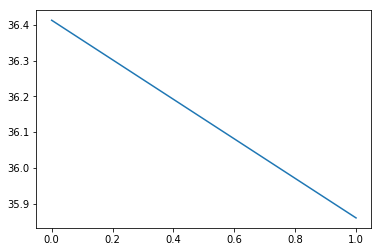

In [162]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses[0:-1:200])

In [163]:
print(all_losses[0:-1:100])

[36.413177490234375, 35.85969543457031]


['Pierre', 'Vinken', ',', '61', 'years', 'old', ',', ...]